## Zomato Restaurant Project

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing 'Country-Code' dataset
c=pd.read_excel(r'D:\Files\Country-Code.xlsx')

In [3]:
#Importing 'Zomato' dataset
z=pd.read_csv(r'D:\Files\zomato.csv',encoding='ISO-8859-1')

In [4]:
#merging 'Country-Code' and 'Zomato' data frame
df=pd.merge (c,z)
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


This data frame contains information related to **Zomato Restaurant**. It contains **9551 rows and 22 columns** out of which **20 columns are inputs** and **2 columns are target variable** i.e. **'Average Cost for two' and 'Price range' columns**.  
  
The data frame contains both  **numeric and catagorical data.**  
  
We are going to treat **'Average Cost for two' as Target variable** and **rest of the columns as inputs.**  
  
**'Average Cost for two' column has numeric data,** thus it represents **Regression Problem**.  
  
***The goal is to predict Average Cost for two.***   

In [5]:
df.columns#checking columns of data frame

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
#Checking data type of columns
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

There are **three types** of data present in this data frame which are **'int64', 'object' and 'float64'**.  
  
**Majority** of the data type is **'object'**.

In [7]:
#checking for whitespace characters in columns of data frame
col=df.columns.tolist() #Storing columns name as list in 'col' variable

space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable

for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not df.loc[df[i]==space].empty:#Checking if any row contains white space characters
            
            validation+=1#increasing 1 in 'validation' variable
            
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:#Using 'if' to check whether 'validation' variable's value matches to '0' or not.
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [8]:
df.isnull().sum() #Checking if null values are present in data frame 

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Only **'Cuisines'** feature **contains null values.**

In [9]:
mode=df['Cuisines'].mode()[0]#fetching mode

print(f'Using mode value as "{mode}".')#printing

df['Cuisines'].fillna(mode,inplace=True)#filling Null values

Using mode value as "North Indian".


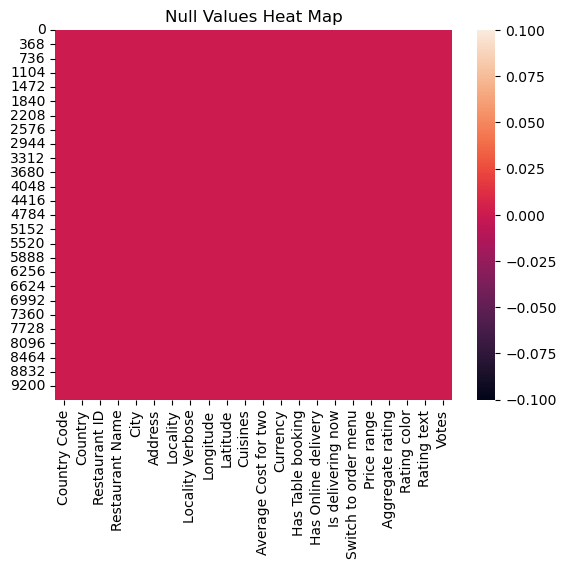

In [10]:
sb.heatmap(df.isnull())#Visualizing null values via Heatmap
plt.title('Null Values Heat Map')
plt.show()

We can confirm that now this **data frame does not have null values present in it.**

In [11]:
#creating a function named 'dup' to check for duplicate values in data frame

def dup(x):#takes one argument i.e variable which stores data frame
    
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable
    
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    
    else:
        print(f'Total duplicate values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(df)

This data frame does not contains duplicate values.


In [12]:
df.info()#Checking more information related to data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9551 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

This shows **information** related to the **columns** and about their **Non-null count** and **Dtype.** It also shows the memory usage , which is **1.7+ MB** in this case.

In [13]:
#fetching details of columns, such as Unique values, Number of unique values and their value counts 
for i in col:#Iterating through 'col' variable
    print('\n',i,':-\nUnique values:',df[i].unique(),'\nNumber of unique values:',df[i].nunique(),'\n\n',df[i].value_counts().to_frame('Value Counts'))#Printing


 Country Code :-
Unique values: [  1  14  30  37  94 148 162 166 184 189 191 208 214 215 216] 
Number of unique values: 15 

      Value Counts
1            8652
216           434
215            80
30             60
189            60
214            60
148            40
208            34
14             24
162            22
94             21
166            20
184            20
191            20
37              4

 Country :-
Unique values: ['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States'] 
Number of unique values: 15 

                 Value Counts
India                   8652
United States            434
United Kingdom            80
Brazil                    60
South Africa              60
UAE                       60
New Zealand               40
Turkey                    34
Australia                 24
Phillipines               22
Indonesia                 21


This gives a breif information about **unique values, count of unique values and value counts** of each column present in the data frame.  
  
We can **drop 'Country Code'** feature as it **holds same information** as of **'Country' feature**.  
  
**'Restaurant ID'** feature can be **dropped** as all values present in it are unique and **it does not hold any potential for further analysis.**  
  
**'Switch to order menu'** feature can be **dropped** as all values present in are same.  

**Target variable** has **140 unique values**.  

In [14]:
df.drop(['Country Code','Restaurant ID','Switch to order menu'],axis=1,inplace=True)#dropping features
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,India,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140
1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71
2,India,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94
3,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87
4,India,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,United States,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,"American, Bar Food",10,Dollar($),No,No,No,1,3.7,Yellow,Good,101
9547,United States,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,Thai,10,Dollar($),No,No,No,1,3.5,Yellow,Good,58
9548,United States,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,2,3.9,Yellow,Good,156
9549,United States,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,2,3.9,Yellow,Good,156


**'Country Code', 'Switch to order menu' and 'Restaurant ID'** features are **dropped successfully**. **Now** the data frame **has 19 columns** out of which 18 columns are inputs are remaining column is target variable.

In [15]:
df.to_csv(r'D:\Files\R-ZR.csv')#exporting data frame as csv 

In [16]:
df.describe()#Using describe function on data frame

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


This gives the statistical information of the numerical columns. From the above description we can observe the following:   
  
1)There are no missing values.    
  
2)Mean is oddly greater than 50% in **'Average Cost for two'** and **'Votes'** columns which means that these data **might** be **skewed to the right** in these columns.    

3)Mean is oddly smaller than 50% in **'Longitude'** and **'Latitude'** columns which means that these data **might** be **skewed to the left** in these columns.    
  
4)There is huge jump between max and 75% in **'Longitude', 'Latitude', 'Average Cost for two' and 'Votes'** columns which means that there **might** be **outliers present** in these columns.

In [17]:
col=df.columns.to_list()#updating 'col' list

#creating empty lists
cat_c=[]
num_c=[]

for i in col:#Iterating through 'col' list
    
    if df[i].dtypes=='object': #using if condition to check for 'object' data type
        cat_c.append(i)#appending 'i'
        
    elif df[i].dtypes=='int64' or 'float64': #using elif condition to check for 'float64' and 'int64' data types
        num_c.append(i)#appending 'i'

In [18]:
#checking contents of 'cat_c' list
cat_c

['Country',
 'Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Rating color',
 'Rating text']

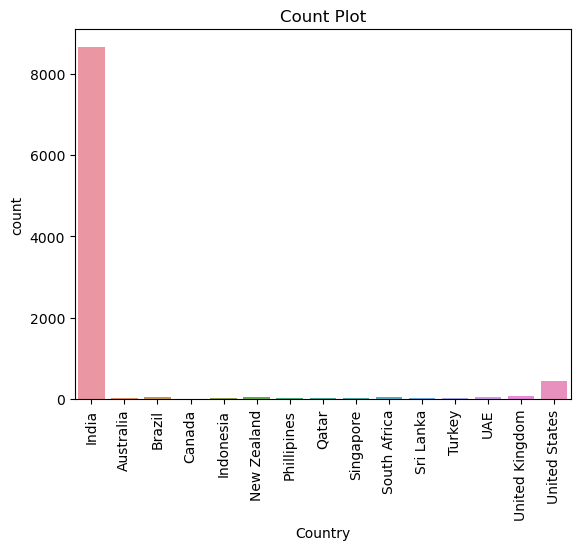

In [19]:
#checking count of values present in 'Country' feature
sb.countplot(data=df,x='Country')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

**Most** occuring country is **'India'**.

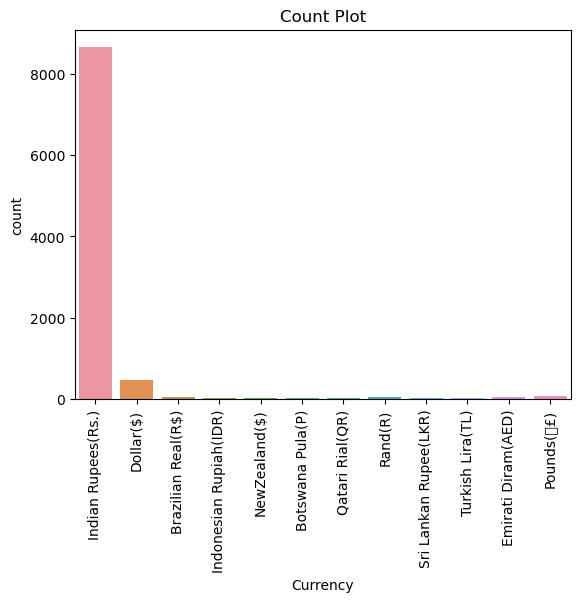

In [20]:
#checking count of values present in 'Currency' feature
sb.countplot(data=df,x='Currency')
plt.title('Count Plot')
plt.xticks(rotation=90)
plt.show()

**Most** occuring currency is **'Indian Rupees(Rs.)'**.

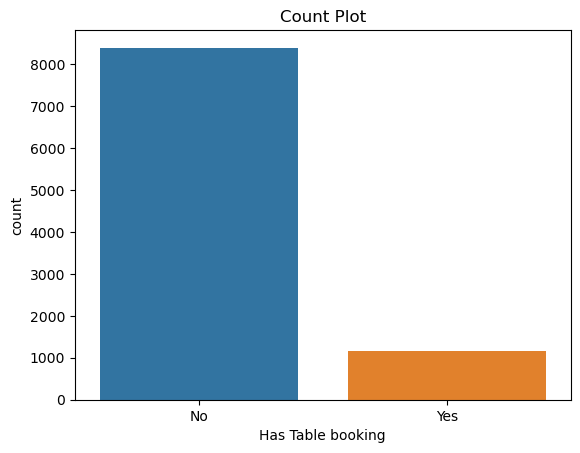

In [21]:
#checking count of values present in 'Has Table booking' feature
sb.countplot(data=df,x='Has Table booking')
plt.title('Count Plot')
plt.show()

**Most** of the restaurant **do not have table booking.**

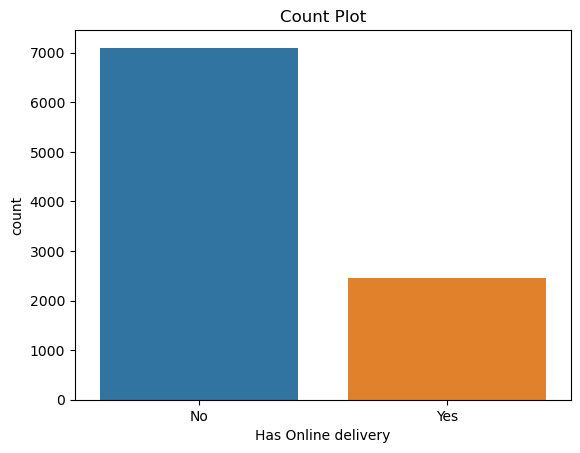

In [22]:
#checking count of values present in 'Has Online delivery' feature
sb.countplot(data=df,x='Has Online delivery')
plt.title('Count Plot')
plt.show()

**Most** of the restaurant **do not have online delivery.**

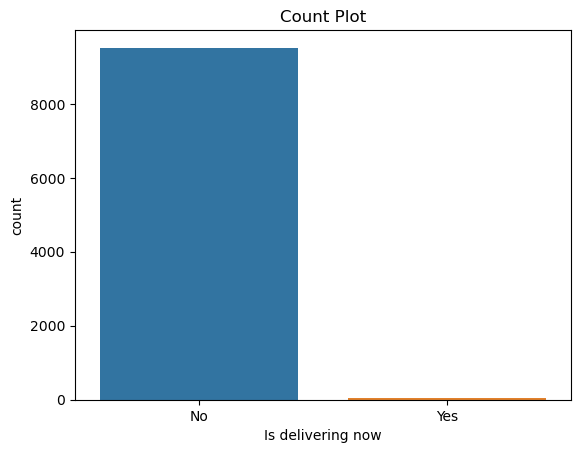

In [23]:
#checking count of values present in 'Is delivering now' feature
sb.countplot(data=df,x='Is delivering now')
plt.title('Count Plot')
plt.show()

**Most** of the restaurant **are not delivering now.**

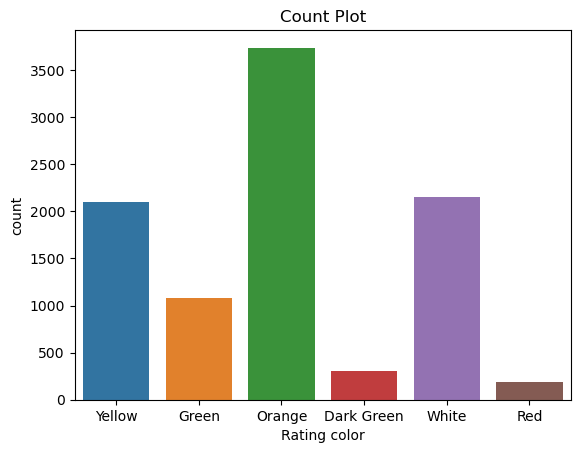

In [24]:
#checking count of values present in 'Rating color' feature
sb.countplot(data=df,x='Rating color')
plt.title('Count Plot')
plt.show()

**Most** of the restaurant have **'Orange'** rating color. 

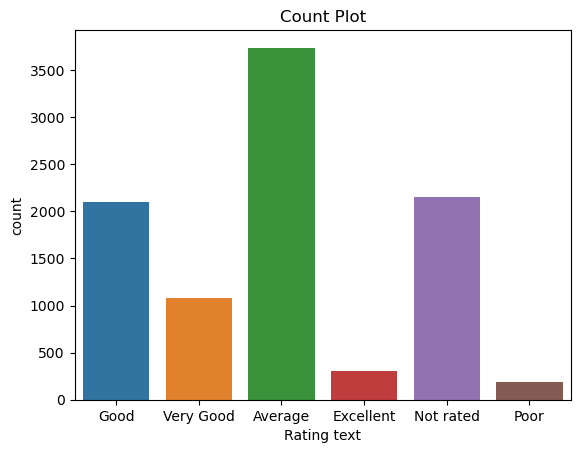

In [25]:
#checking count of values present in 'Rating text' feature
sb.countplot(data=df,x='Rating text')
plt.title('Count Plot')
plt.show()

**Most** of the restaurant have **'Average'** rating text. 

In [26]:
#checking contents of 'num_c' list
num_c

['Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [27]:
log=[]#creating empty list which is stored in 'log' variable 

def re():#creating a function named 're'
    
    for i in num_c:#iterating through 'num_c' variable
        if i not in log:#using if condition to plot graphs
            sb.lmplot(data=df,x=log[-1],y=i)
            plt.title('Linear Model Plot')
    plt.show()

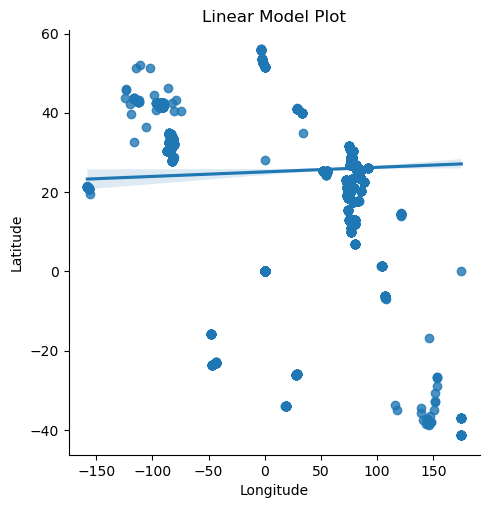

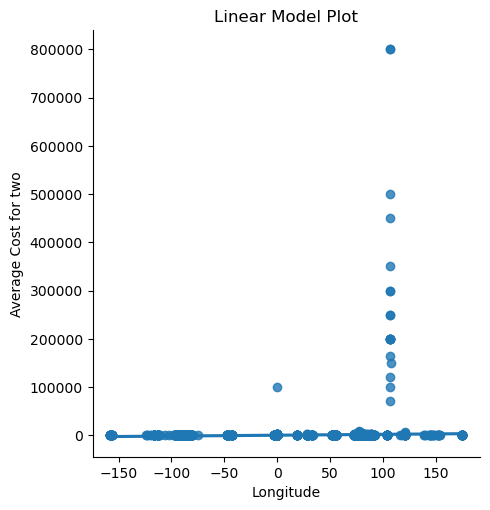

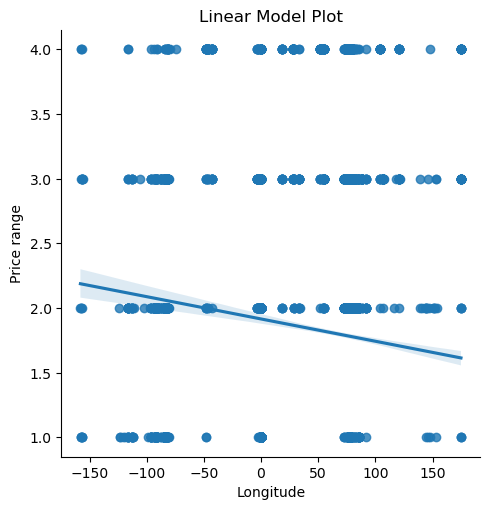

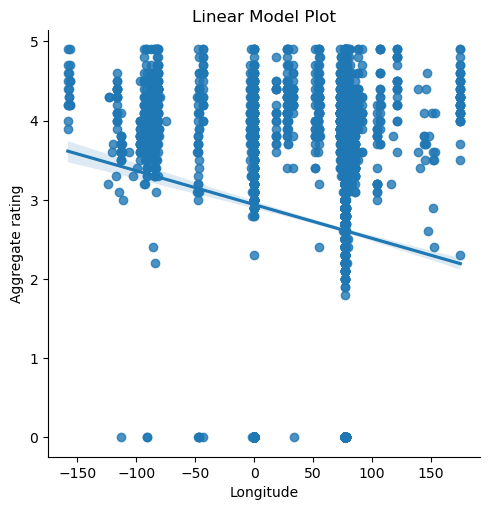

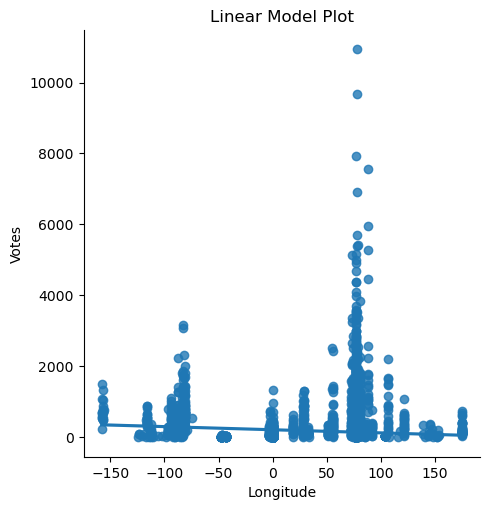

In [28]:
#checking linear relation of 'Longitude' feature with other columns 
log.append('Longitude')#Appending feature
re()#calling function

**'Longitude'** feature has **almost no linear relation** with other remaining columns.

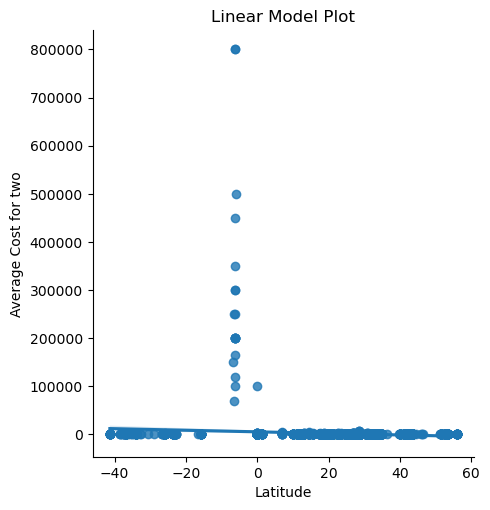

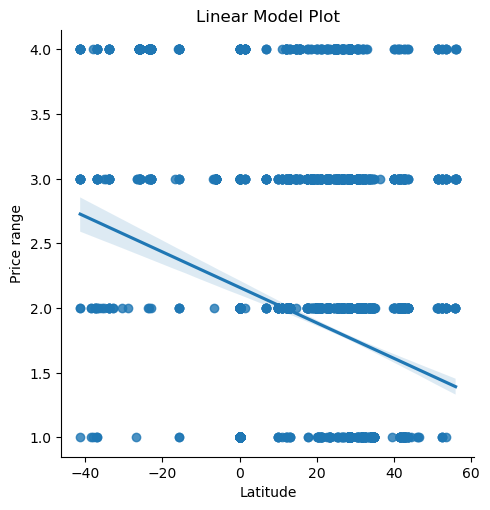

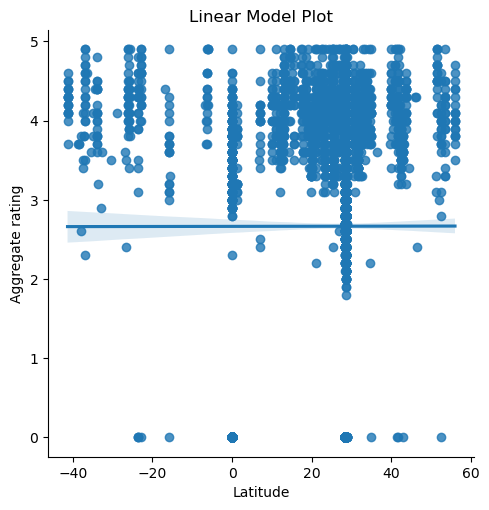

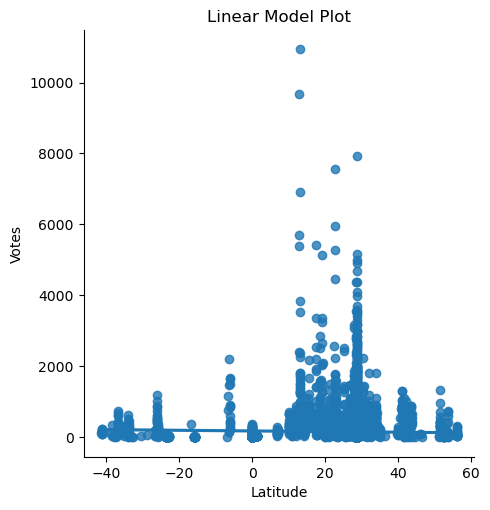

In [29]:
#checking linear relation of 'Latitude' feature with other columns 
log.append('Latitude')#Appending feature
re()#calling function

**'Latitude'** feature has **almost no linear relation** with other remaining columns.

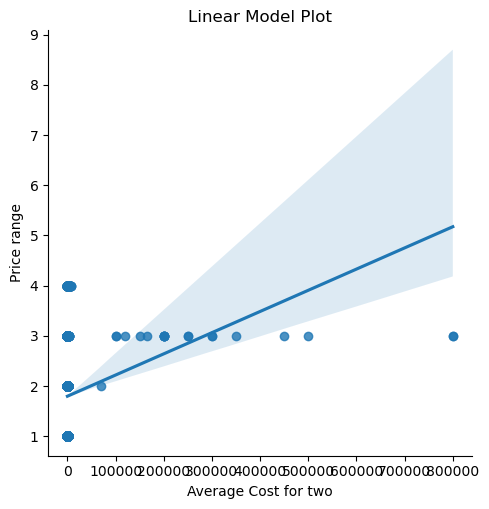

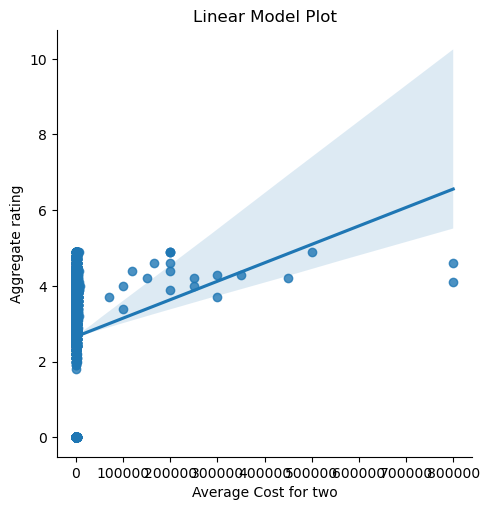

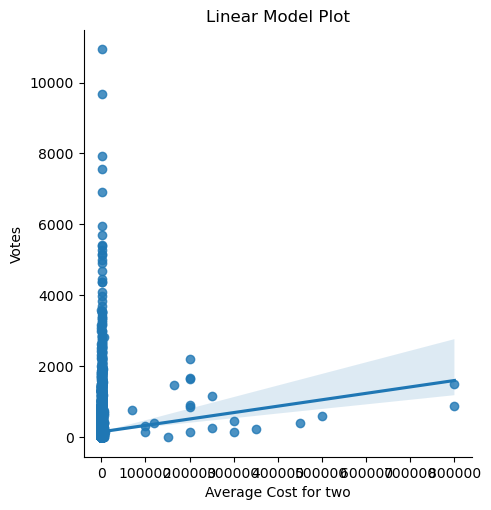

In [30]:
#checking linear relation of 'Average Cost for two' column with other columns 
log.append('Average Cost for two')#Appending column
re()#calling function

**'Average Cost for two'** column has **high positive linear relation** with **'Price range', 'Aggregate rating' and 'Votes'** columns.

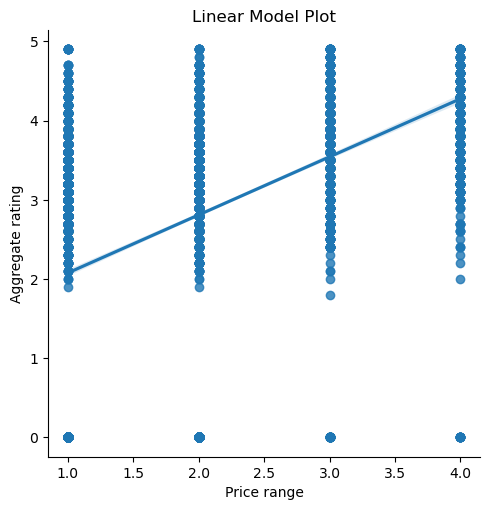

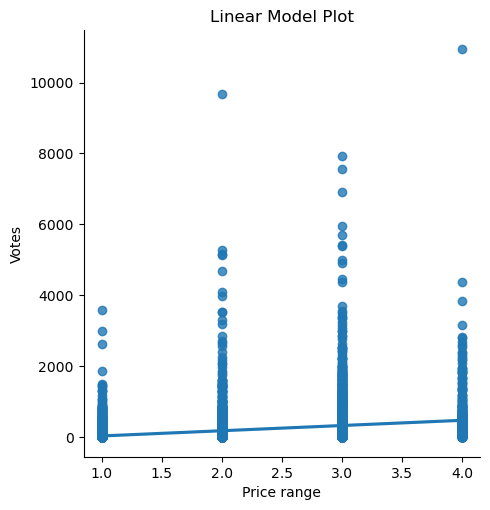

In [31]:
#checking linear relation of 'Price range' column with other features
log.append('Price range')#Appending column
re()#calling function

**'Price range'** feature has **almost no linear relation** with other remaining columns.

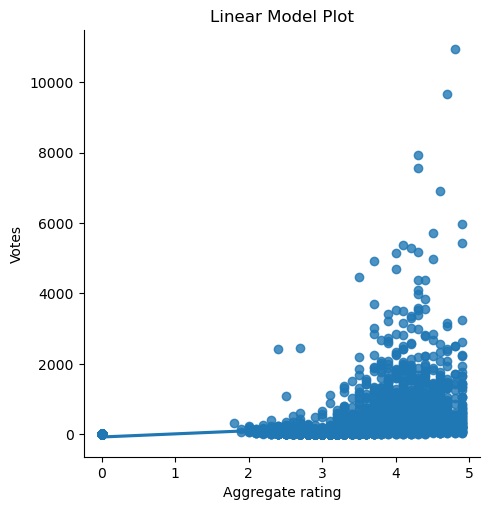

In [32]:
#checking linear relation between 'Aggregate rating' and 'Votes' features
log.append('Aggregate rating')#Appending feature
re()#calling function

**'Aggregate rating' and 'Votes'** features have **high linear relation** with each other.

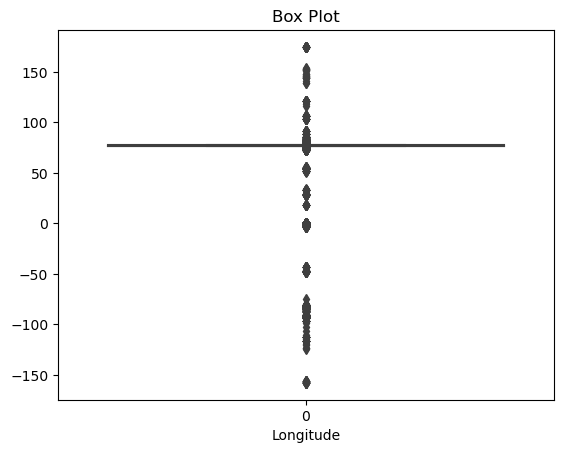

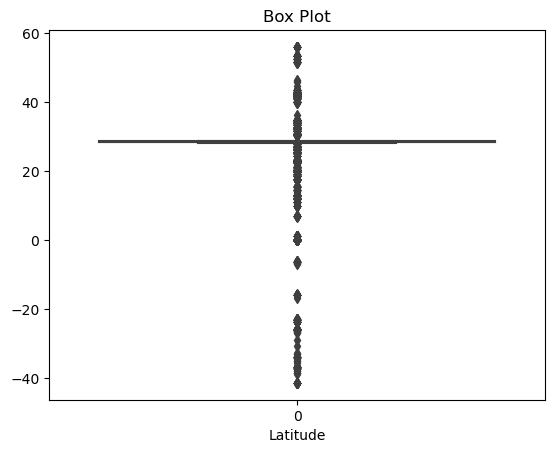

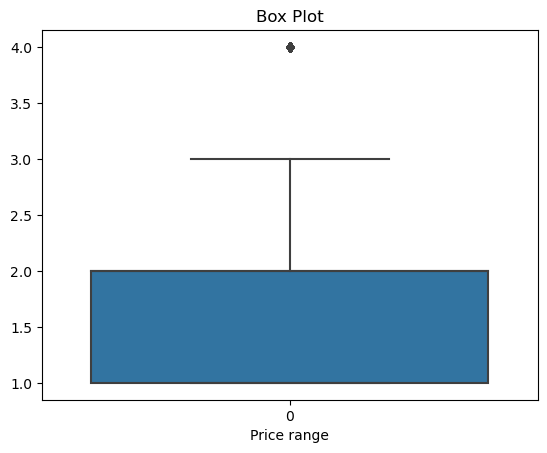

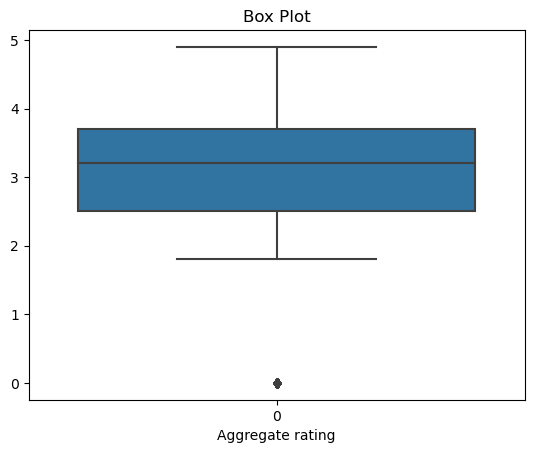

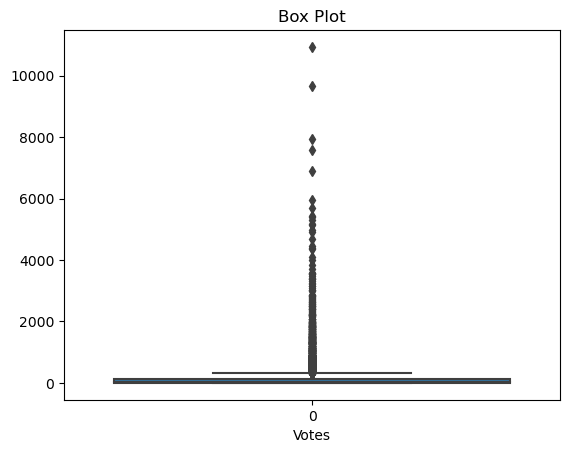

In [33]:
#Checking outliers via Box Plot
out=list(num_c)#creating new list with same data as 'num_c'

out.remove('Average Cost for two')#removing column from the list

for i in out:
    sb.boxplot(df[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

**All** of these features **contains outliers.**

In [34]:
#Importing necessary libraries
from scipy.stats import zscore as zs

f_outlier=df[out]
z=np.abs(zs(f_outlier))
z

,Longitude,Latitude,Price range,Aggregate rating,Votes
0,0.334861,0.118764,1.319803,0.813580,0.039312
1,1.546527,2.348827,0.215516,0.549780,0.199722
2,0.334862,0.118689,0.215516,0.615730,0.146252
3,0.334536,0.121877,0.215516,0.879530,0.162525
4,0.334765,0.122404,1.319803,1.011430,0.046706
...,...,...,...,...,...
9546,3.773364,1.512081,0.888771,0.681680,0.129978
9547,3.773370,1.512037,0.888771,0.549780,0.229944
9548,3.773071,1.509099,0.215516,0.813580,0.002115
9549,3.488640,1.321086,0.215516,0.813580,0.002115


The **variable 'z'** holds the **zscores values** of these features.

In [35]:
#checking outliers as per the threshold value as '3'
np.where(z>3)

(array([  20,  102,  103,  104,  107,  111,  112,  115,  119,  169,  181,
         183,  187,  189,  190,  191,  193,  197,  200,  520,  523,  539,
         611,  623,  624,  627,  628,  629,  631,  632,  634,  840,  930,
         931, 1215, 1237, 1242, 1676, 1678, 1680, 1683, 1687, 1690, 1714,
        1720, 1778, 1780, 1782, 1785, 1786, 1787, 1788, 1789, 1790, 1792,
        1856, 1859, 1860, 1861, 1864, 1866, 1868, 1871, 1875, 2011, 2256,
        2381, 2384, 2389, 2392, 2394, 2401, 2402, 2404, 2409, 2417, 2425,
        2431, 2432, 2433, 2436, 2444, 2451, 2456, 2459, 2461, 2469, 2470,
        2471, 2477, 2483, 2486, 2488, 2491, 2492, 2493, 2494, 2495, 2692,
        2695, 2712, 2713, 2714, 2814, 2964, 2965, 2975, 2977, 2981, 3352,
        3359, 3360, 3362, 3368, 3369, 3370, 3374, 3463, 3538, 3554, 3696,
        3762, 4014, 4015, 4025, 4049, 4383, 4402, 5520, 5693, 5910, 6035,
        6077, 6085, 6088, 6224, 6297, 6373, 6409, 6421, 6463, 7239, 7770,
        7810, 8533, 8537, 8541, 8543, 

In [36]:
#checking value of the outliers
z.iloc[20,4]

3.313033670011215

In [37]:
z.iloc[102,4]

5.251907419426422

In [38]:
z.iloc[103,4]

5.142642352013334

In [39]:
z.iloc[104,4]

25.054457296547206

We can confirm that these values holds outlier as per the threshold value.

In [40]:
#Removing outliers 
zscore=df[(z<3).all(axis=1)]#storing values in 'zscore' variable

In [41]:
#Using IQR method to remove outliers from the original data frame
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=df[~((df< (q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [42]:
print('Data loss percentage after removing outliers via zscore method',((df.shape[0]-zscore.shape[0])/df.shape[0])*100)
print('Data loss percentage after removing outliers via IQR method',((df.shape[0]-IQR.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers via zscore method 8.156214009004293
Data loss percentage after removing outliers via IQR method 48.644121034446655


We can observe that **zscore method performed well** than IQR method, hence, we will **update** the data frame with **zscore method.**

In [43]:
outliers=df.shape[0]-zscore.shape[0]#storing number of outliers removed in 'outliers' variable

print(f'Outliers removed : {outliers}')#printing
df=zscore#Updating data frame

Outliers removed : 779


In [44]:
df.shape#checking shape of data frame

(8772, 19)

Now the data frame has **8772 rows.**

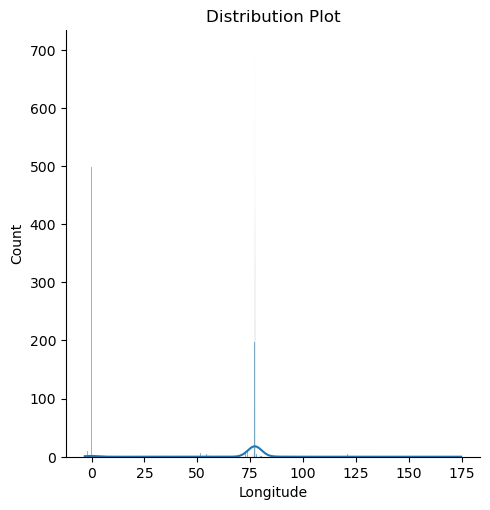

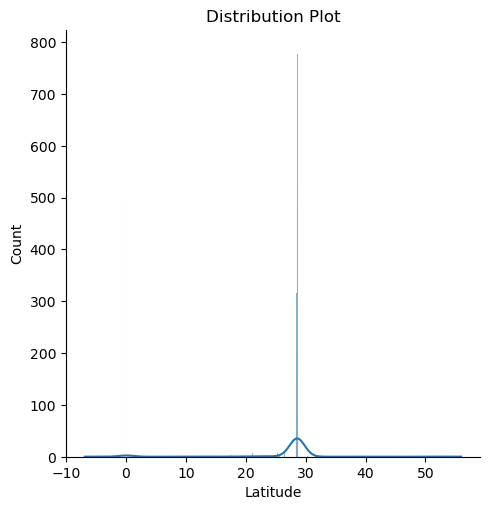

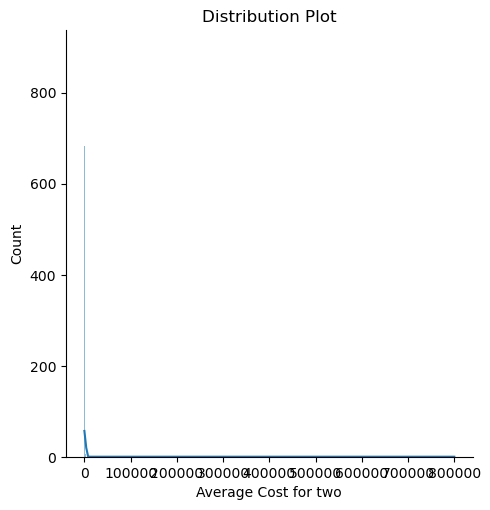

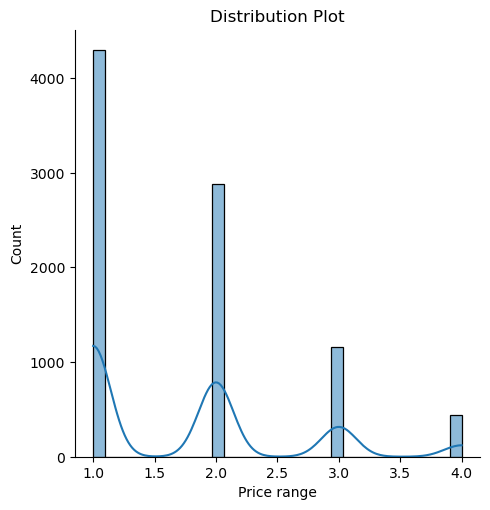

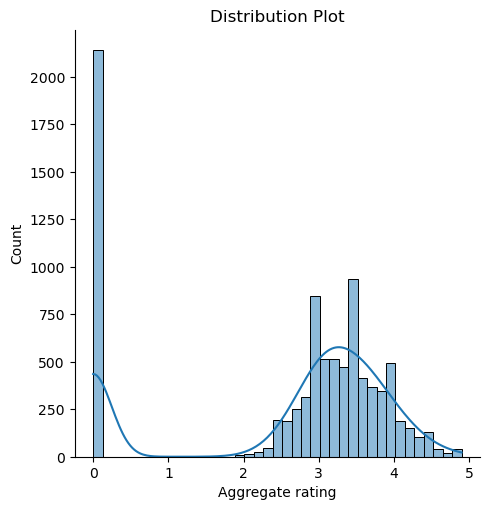

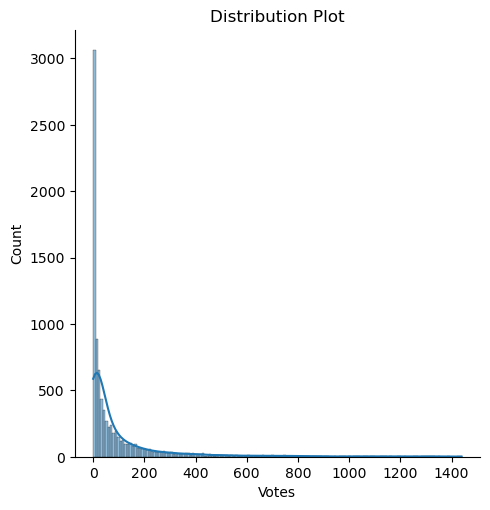

In [45]:
#checking distribution of columns
for i in num_c:
    sb.displot(df[i],kde=True)
    plt.title('Distribution Plot')    

**'Average Cost for two', 'Price range' and 'Votes'** columns are skewed to the right.  
  
**'Longitude', 'Latitude' and 'Aggregate rating'** features are skewed to the left.

In [46]:
df.skew()

Longitude               -3.154060
Latitude                -2.254203
Average Cost for two    37.361532
Price range              0.981206
Aggregate rating        -0.888635
Votes                    3.532071
dtype: float64

All of these  columns are in **unacceptable range**, thus , we can use **yeojohnson method** to remove skewness. 

In [47]:
from scipy.stats import yeojohnson as yj #importing library

for i in num_c:#iterating through 'num_c' variable
    df[i],p=yj(df[i])

df.skew()

Longitude              -0.973902
Latitude                0.343832
Average Cost for two   -0.053044
Price range             0.220810
Aggregate rating       -0.619464
Votes                  -0.012469
dtype: float64

Skewness is reduced, however **'Longitude' and 'Aggregate rating'** column are still in  **unacceptable range**, thus , we can try **square root method**.         

In [49]:
a=['Longitude', 'Aggregate rating']#creating list

sk_data=df.copy()#copying data of 'df' data frame

for i in a:#iterating through 'a' variable
    
    sk_data[i]=np.sqrt(sk_data[i])

sk_data.skew()

Longitude              -3.298443
Latitude                0.343832
Average Cost for two   -0.053044
Price range             0.220810
Aggregate rating       -1.030318
Votes                  -0.012469
dtype: float64

Skewness is increased, trying log+ 1 method.

In [48]:
a=['Longitude', 'Aggregate rating']#creating list

sk_data=df.copy()#copying data of 'df' data frame

for i in a:#iterating through 'a' variable
    
    sk_data[i]=np.log1p(sk_data[i])

sk_data.skew()

Longitude              -3.645368
Latitude                0.343832
Average Cost for two   -0.053044
Price range             0.220810
Aggregate rating       -1.072710
Votes                  -0.012469
dtype: float64

Skewness is increased, trying cube root method.

In [50]:
sk_data=df.copy()#copying data of 'df' data frame

for i in a:#iterating through 'a' variable
    
    sk_data[i]=np.cbrt(sk_data[i])

sk_data.skew()

Longitude              -3.310887
Latitude                0.343832
Average Cost for two   -0.053044
Price range             0.220810
Aggregate rating       -1.118416
Votes                  -0.012469
dtype: float64

Skewness is increased. We have applied various applicable methods, thus we can **accept  this value as a threshold value**.           

In [52]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,India,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",7469.932163,180.327138,"North Indian, Mughlai",6.219615,Indian Rupees(Rs.),No,No,No,0.609634,8.159004,Yellow,Good,5.203278
1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",6.054793,Indian Rupees(Rs.),No,No,No,0.559213,6.981416,Yellow,Good,4.465879
2,India,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",7469.945522,180.317984,North Indian,5.767416,Indian Rupees(Rs.),No,No,No,0.559213,7.269242,Yellow,Good,4.768819
3,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",7467.103671,180.705844,Rajasthani,5.575631,Indian Rupees(Rs.),No,No,No,0.559213,8.464259,Green,Very Good,4.685006
4,India,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",7469.092841,180.769946,"North Indian, Chinese, Mughlai",6.357009,Indian Rupees(Rs.),No,No,No,0.609634,9.087615,Green,Very Good,5.461279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,United Kingdom,Gaucho,Manchester,"2A St Mary's Street, Spinningfields, Mancheste...",Spinningfields,"Spinningfields, Manchester",-1.035332,562.153993,"Argentine, American",4.166709,Pounds(£),No,No,No,0.636862,10.054385,Dark Green,Excellent,6.832103
9113,United Kingdom,Akbars,Manchester,"73-83 Liverpool Road, Spinningfields, Manchest...",Spinningfields,"Spinningfields, Manchester",-1.037033,562.051671,Indian,3.293844,Pounds(£),No,No,No,0.559213,9.087615,Green,Very Good,6.321173
9114,United Kingdom,San Carlo,Manchester,"40-42 King Street West, Spinningfields, Manche...",Spinningfields,"Spinningfields, Manchester",-1.035620,562.138931,Italian,3.131763,Pounds(£),No,No,No,0.559213,9.405664,Green,Very Good,7.074657
9115,United Kingdom,Mr Cooper's House & Garden - The Midland,Manchester,"The Midland, Peter Street, Deansgate, Manchest...","The Midland, Deansgate","The Midland, Deansgate, Manchester",-1.034717,562.066910,"European, Mediterranean, Contemporary",3.833695,Pounds(£),Yes,No,No,0.609634,9.087615,Green,Very Good,4.403625


In [53]:
for i in cat_c:#iterating through 'cat_c' list
    
    df[i]=le.fit_transform(df[i])#Transforming columns
    
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,2887,1,3939,15,15,7469.932163,180.327138,1219,6.219615,3,0,0,0,0.609634,8.159004,5,2,5.203278
1,0,4779,1,3990,15,15,0.000000,0.000000,1219,6.054793,3,0,0,0,0.559213,6.981416,5,2,4.465879
2,0,6287,1,5575,15,15,7469.945522,180.317984,1015,5.767416,3,0,0,0,0.559213,7.269242,5,2,4.768819
3,0,1502,1,95,160,161,7467.103671,180.705844,1340,5.575631,3,0,0,0,0.559213,8.464259,1,5,4.685006
4,0,4452,1,1086,160,161,7469.092841,180.769946,1081,6.357009,3,0,0,0,0.609634,9.087615,1,5,5.461279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,9,2340,38,1319,800,853,-1.035332,562.153993,57,4.166709,6,0,0,0,0.636862,10.054385,0,1,6.832103
9113,9,195,38,2314,800,853,-1.037033,562.051671,760,3.293844,6,0,0,0,0.559213,9.087615,1,5,6.321173
9114,9,5017,38,1805,800,853,-1.035620,562.138931,782,3.131763,6,0,0,0,0.559213,9.405664,1,5,7.074657
9115,9,3893,38,7903,853,906,-1.034717,562.066910,606,3.833695,6,1,0,0,0.609634,9.087615,1,5,4.403625


All the catagorical data have been encoded. 

In [54]:
#Checking correlation between independant and dependant variables
cor=df.corr()
cor

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
Country,1.000000,0.019972,-0.191717,-0.051231,-0.076930,-0.075516,-0.280403,0.361474,-0.036789,-0.285689,0.559992,0.016257,-0.057344,-0.010429,0.208131,0.206414,-0.160832,0.131796,0.171732
Restaurant Name,0.019972,1.000000,0.001003,0.003457,0.005811,0.005797,0.012139,0.015583,0.057405,0.046101,0.014125,0.039140,0.030042,0.012700,0.066473,0.031996,-0.009720,0.010369,0.041465
City,-0.191717,0.001003,1.000000,-0.075213,-0.011848,-0.015637,0.102704,-0.007937,0.017462,-0.037123,-0.190667,-0.007058,-0.001578,-0.019599,-0.154510,-0.149198,0.100311,-0.086141,-0.126476
Address,-0.051231,0.003457,-0.075213,1.000000,0.148220,0.150032,-0.002081,-0.030491,-0.013738,0.022378,-0.046220,-0.009639,-0.001081,0.029323,-0.039139,-0.100887,0.057379,0.044369,-0.126900
Locality,-0.076930,0.005811,-0.011848,0.148220,1.000000,0.999183,-0.004839,-0.009559,-0.011259,-0.056357,-0.047322,-0.069803,-0.046753,-0.010323,-0.114785,-0.165314,0.017272,-0.008358,-0.188039
Locality Verbose,-0.075516,0.005797,-0.015637,0.150032,0.999183,1.000000,-0.005826,-0.010114,-0.012325,-0.055005,-0.046687,-0.068959,-0.047153,-0.010304,-0.112212,-0.164051,0.017500,-0.006789,-0.186127
Longitude,-0.280403,0.012139,0.102704,-0.002081,-0.004839,-0.005826,1.000000,0.274761,0.013551,0.209951,-0.349865,0.065383,0.115102,0.013352,0.013551,0.098369,-0.044555,-0.105734,0.122879
Latitude,0.361474,0.015583,-0.007937,-0.030491,-0.009559,-0.010114,0.274761,1.000000,0.021389,-0.221985,0.358717,0.047601,0.094221,0.013487,-0.005134,0.081038,-0.069239,-0.096731,0.069586
Cuisines,-0.036789,0.057405,0.017462,-0.013738,-0.011259,-0.012325,0.013551,0.021389,1.000000,0.002285,0.007283,0.040558,-0.038290,0.005413,0.019946,-0.061421,-0.039493,-0.060547,-0.035199
Average Cost for two,-0.285689,0.046101,-0.037123,0.022378,-0.056357,-0.055005,0.209951,-0.221985,0.002285,1.000000,-0.165769,0.474798,0.186050,0.028362,0.674300,0.313564,-0.040776,0.013227,0.410375


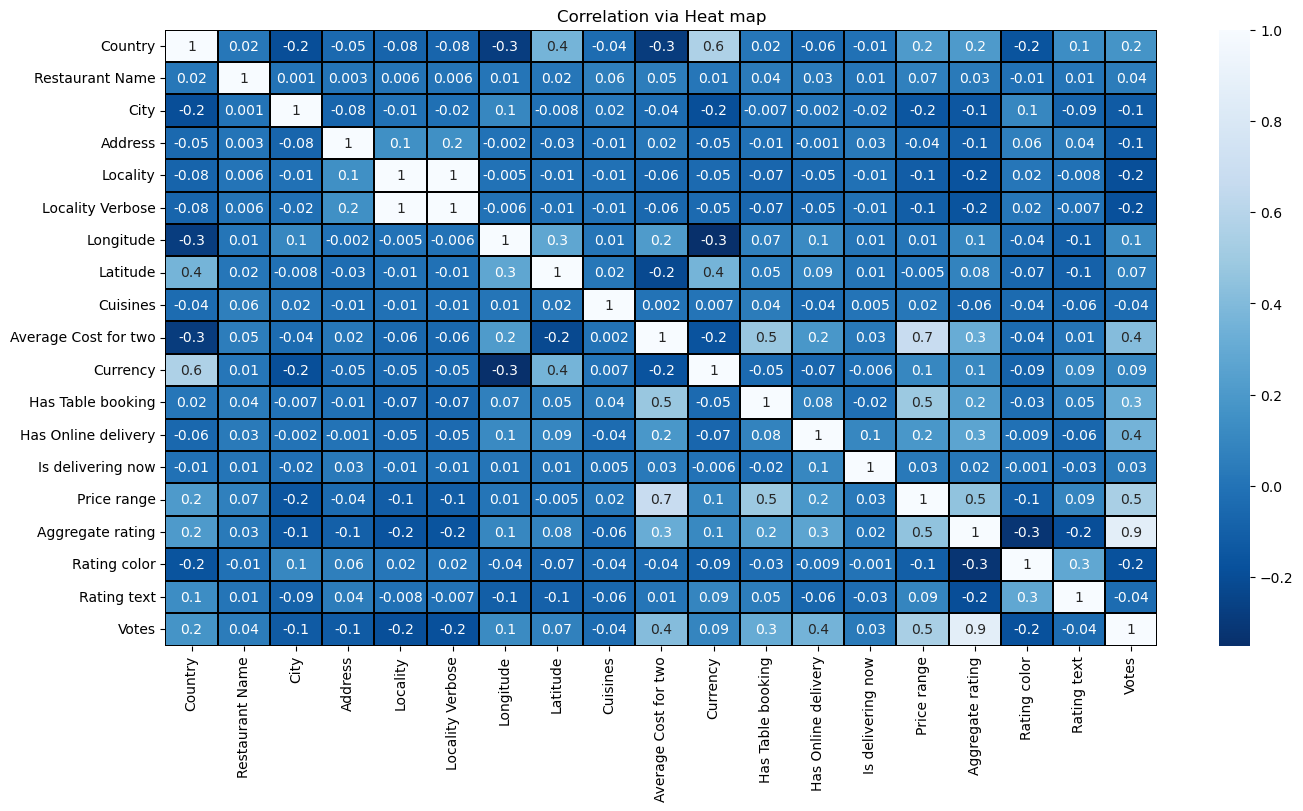

In [55]:
#Visualizing correlation via heat map
plt.figure(figsize=(16,8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
  
1)**'Restaurant Name', 'Address', 'Longitude', 'Cuisines', 'Has Online delivery', 'Is delivering now', 'Aggregate rating' and 'Rating text'** features have **low positive correlation** with **target variable.**  
  
2)**'Has Table booking', 'Price range' and 'Votes'** features have **moderate positive correlation** with **target variable.** 
  
3)**'Country', 'City', 'Locality', 'Locality Verbose', 'Latitude', 'Currency' and 'Rating color'** features have **low negative correlation** with  **target variable.**   
    
4)These are the following **pairs with high positive correlation with each other:**  
  
**'Locality' and 'Locality Verbose'** features   
**'Aggregate rating' and 'Votes'** features    

In [56]:
#Separating features and target variable 
x=df.drop('Average Cost for two',axis=1)
y=df['Average Cost for two']

In [57]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape,'\nDimensions of label:',y.shape)

Dimensions of features: (8772, 18) 
Dimensions of label: (8772,)


We can observe that both features and lable have **same number of rows**.  
**'x'** contains **18 features**.

In [58]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc

sc=sc()#creating instance

x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)#transforming data
x

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-0.167196,-0.217599,-3.727043,-0.090699,-2.086164,-2.031976,0.298862,-0.039848,1.033031,-0.091962,-0.377472,-0.61266,-0.062378,1.353405,0.998297,1.391129,0.199420,0.943919
1,-0.167196,0.756421,-3.727043,-0.068948,-2.086164,-2.031976,-3.260883,-2.856563,1.033031,-0.091962,-0.377472,-0.61266,-0.062378,0.649025,0.621892,1.391129,0.199420,0.585727
2,-0.167196,1.532755,-3.727043,0.607036,-2.086164,-2.031976,0.298868,-0.039991,0.555465,-0.091962,-0.377472,-0.61266,-0.062378,0.649025,0.713893,1.391129,0.199420,0.732880
3,-0.167196,-0.930610,-3.727043,-1.730121,-1.488757,-1.467823,0.297514,-0.033933,1.316293,-0.091962,-0.377472,-0.61266,-0.062378,0.649025,1.095870,-1.429881,2.034360,0.692168
4,-0.167196,0.588079,-3.727043,-1.307471,-1.488757,-1.467823,0.298462,-0.032932,0.709972,-0.091962,-0.377472,-0.61266,-0.062378,1.353405,1.295120,-1.429881,2.034360,1.069243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8767,7.174173,-0.499200,-0.295100,-1.208099,1.148076,1.206110,-3.261376,5.924298,-1.687221,4.960367,-0.377472,-0.61266,-0.062378,1.733785,1.604140,-2.135133,-0.412227,1.735122
8768,7.174173,-1.603467,-0.295100,-0.783743,1.148076,1.206110,-3.261377,5.922700,-0.041492,4.960367,-0.377472,-0.61266,-0.062378,0.649025,1.295120,-1.429881,2.034360,1.486937
8769,7.174173,0.878946,-0.295100,-1.000826,1.148076,1.206110,-3.261376,5.924063,0.010010,4.960367,-0.377472,-0.61266,-0.062378,0.649025,1.396782,-1.429881,2.034360,1.852943
8770,7.174173,0.300300,-0.295100,1.599902,1.366438,1.410905,-3.261376,5.922938,-0.402007,4.960367,2.649204,-0.61266,-0.062378,1.353405,1.295120,-1.429881,2.034360,0.555487


The data is scaled using StandarScaler method to overcome the **issue of biasness.**

In [59]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library

v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.860032,Country
1,1.009051,Restaurant Name
2,1.110797,City
3,1.055475,Address
4,622.562646,Locality
5,622.485305,Locality Verbose
6,1.617294,Longitude
7,1.738679,Latitude
8,1.028400,Cuisines
9,1.829605,Currency


**'Locality', 'Locality Verbose' and 'Votes'** features have **high VIF value**, thus posing **multicollinearity problem**. We can **drop 'Locality'** feature as it has the **highest VIF value.** 

In [60]:
x.drop('Locality',axis=1,inplace=True)#Dropping 'Locality' feature
x

,Country,Restaurant Name,City,Address,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-0.167196,-0.217599,-3.727043,-0.090699,-2.031976,0.298862,-0.039848,1.033031,-0.091962,-0.377472,-0.61266,-0.062378,1.353405,0.998297,1.391129,0.199420,0.943919
1,-0.167196,0.756421,-3.727043,-0.068948,-2.031976,-3.260883,-2.856563,1.033031,-0.091962,-0.377472,-0.61266,-0.062378,0.649025,0.621892,1.391129,0.199420,0.585727
2,-0.167196,1.532755,-3.727043,0.607036,-2.031976,0.298868,-0.039991,0.555465,-0.091962,-0.377472,-0.61266,-0.062378,0.649025,0.713893,1.391129,0.199420,0.732880
3,-0.167196,-0.930610,-3.727043,-1.730121,-1.467823,0.297514,-0.033933,1.316293,-0.091962,-0.377472,-0.61266,-0.062378,0.649025,1.095870,-1.429881,2.034360,0.692168
4,-0.167196,0.588079,-3.727043,-1.307471,-1.467823,0.298462,-0.032932,0.709972,-0.091962,-0.377472,-0.61266,-0.062378,1.353405,1.295120,-1.429881,2.034360,1.069243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8767,7.174173,-0.499200,-0.295100,-1.208099,1.206110,-3.261376,5.924298,-1.687221,4.960367,-0.377472,-0.61266,-0.062378,1.733785,1.604140,-2.135133,-0.412227,1.735122
8768,7.174173,-1.603467,-0.295100,-0.783743,1.206110,-3.261377,5.922700,-0.041492,4.960367,-0.377472,-0.61266,-0.062378,0.649025,1.295120,-1.429881,2.034360,1.486937
8769,7.174173,0.878946,-0.295100,-1.000826,1.206110,-3.261376,5.924063,0.010010,4.960367,-0.377472,-0.61266,-0.062378,0.649025,1.396782,-1.429881,2.034360,1.852943
8770,7.174173,0.300300,-0.295100,1.599902,1.410905,-3.261376,5.922938,-0.402007,4.960367,2.649204,-0.61266,-0.062378,1.353405,1.295120,-1.429881,2.034360,0.555487


**'Locality'** feature is **dropped successfully.**

In [61]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.859832,Country
1,1.009045,Restaurant Name
2,1.104468,City
3,1.053782,Address
4,1.060145,Locality Verbose
5,1.616975,Longitude
6,1.738674,Latitude
7,1.027844,Cuisines
8,1.829238,Currency
9,1.379109,Has Table booking


**'Votes'** feature still have **high VIF value**. We can **drop 'Votes'** feature as it has the **highest VIF value.** 

In [62]:
x.drop('Votes',axis=1,inplace=True)#Dropping 'Votes' feature
x

,Country,Restaurant Name,City,Address,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text
0,-0.167196,-0.217599,-3.727043,-0.090699,-2.031976,0.298862,-0.039848,1.033031,-0.091962,-0.377472,-0.61266,-0.062378,1.353405,0.998297,1.391129,0.199420
1,-0.167196,0.756421,-3.727043,-0.068948,-2.031976,-3.260883,-2.856563,1.033031,-0.091962,-0.377472,-0.61266,-0.062378,0.649025,0.621892,1.391129,0.199420
2,-0.167196,1.532755,-3.727043,0.607036,-2.031976,0.298868,-0.039991,0.555465,-0.091962,-0.377472,-0.61266,-0.062378,0.649025,0.713893,1.391129,0.199420
3,-0.167196,-0.930610,-3.727043,-1.730121,-1.467823,0.297514,-0.033933,1.316293,-0.091962,-0.377472,-0.61266,-0.062378,0.649025,1.095870,-1.429881,2.034360
4,-0.167196,0.588079,-3.727043,-1.307471,-1.467823,0.298462,-0.032932,0.709972,-0.091962,-0.377472,-0.61266,-0.062378,1.353405,1.295120,-1.429881,2.034360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8767,7.174173,-0.499200,-0.295100,-1.208099,1.206110,-3.261376,5.924298,-1.687221,4.960367,-0.377472,-0.61266,-0.062378,1.733785,1.604140,-2.135133,-0.412227
8768,7.174173,-1.603467,-0.295100,-0.783743,1.206110,-3.261377,5.922700,-0.041492,4.960367,-0.377472,-0.61266,-0.062378,0.649025,1.295120,-1.429881,2.034360
8769,7.174173,0.878946,-0.295100,-1.000826,1.206110,-3.261376,5.924063,0.010010,4.960367,-0.377472,-0.61266,-0.062378,0.649025,1.396782,-1.429881,2.034360
8770,7.174173,0.300300,-0.295100,1.599902,1.410905,-3.261376,5.922938,-0.402007,4.960367,2.649204,-0.61266,-0.062378,1.353405,1.295120,-1.429881,2.034360


**'Votes'** feature is **dropped successfully.**

In [63]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.859193,Country
1,1.009044,Restaurant Name
2,1.104266,City
3,1.043446,Address
4,1.056676,Locality Verbose
5,1.605866,Longitude
6,1.737956,Latitude
7,1.025910,Cuisines
8,1.826646,Currency
9,1.366112,Has Table booking


Now the multicollinearity problem is solved. 

In [64]:
x.shape#checking shape of x

(8772, 16)

Now **'x'** has **16 features**.

In [65]:
#Importing libraries required for model building
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.svm import SVR as SupportVectorRegression

In [66]:
#Finding best random state on Linear Regression model
r2s_updater=0#initilizing variable
rs_updater=0#initilizing variable

for i in range(1,1000): #running 'if' loop for 999 times
    
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)#spliting data
    
    lr=LinearRegression()#creating instance
    
    lr.fit(x_train,y_train)#fitting  data
    pr=lr.predict(x_test)#predicting data
    r2s=r2_score(y_test,pr)#calculating r2 score 
    
    if r2s>r2s_updater: #using if condition to update 'r2s_updater' and 'rs_updater' only if 'r2s' is greater than 'r2s_updater'
        #updating values
        r2s_updater=r2s
        rs_updater=i

print('Max r2 score during the iteration is ',r2s_updater,'on random state : ',rs_updater)#printing

Max r2 score during the iteration is  0.7539925069888136 on random state :  222


In [67]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#Spliting data on the best random state

In [68]:
#Creating instance of  various models
LR=LinearRegression() 
L=Lasso()
R=Ridge()
EN=ElasticNet()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ETR=ExtraTreesRegressor()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
SVR=SupportVectorRegression()
    
models=[LR,L,R,EN,RFR,GBR,ETR,DTR,KNR,SVR]#Creating list containing the instances of the models

log=float('inf')#Initializing 'log' variable  to positive infinity    

for i in models:#Iterating models 
    
    i.fit(x_train,y_train)#fitting data
    pr=i.predict(x_test)#predicting data
    
    R2score=r2_score(y_test,pr)#calculating r2 score
    MAE=mae(y_test,pr)#calculating Mean Absolute Error
    MSE=mse(y_test,pr)#calculating Mean Squared Error
    RMSE=np.sqrt(MSE)#calculating Root Mean Squared Error
    
    score=cvs(i,x,y)#calculating Cross Validation Score
    diff=abs(R2score - score.mean())*100 #calculating difference of R2score and Cross Validation Score
    
    
    
    #Printing    
    print('\n','R2 score of',str(i).split('(')[0],'is',R2score,'\n','Mean absolute Error of',str(i).split('(')[0],'is',MAE,'\n','Mean squared error of',str(i).split('(')[0],'is',MSE,'\n','Root Mean squared error of',str(i).split('(')[0],'is',RMSE)
    print('\n\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between R2 score and cross validation is ',diff)
    
    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when 'log' is greater than 'diff' and mean of 'score' in not negative
        
        log=diff#Updating 'log' variable if condition is 'True'
        b_d=diff#Storing difference in 'b_d' variable in context to  the corresponding iteration 
        
        model=str(i).split('(')[0]#Storing model name in 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between R2 score and cross validation i.e {b_d}')#Printing         


 R2 score of LinearRegression is 0.7539925069888136 
 Mean absolute Error of LinearRegression is 0.25393626673678604 
 Mean squared error of LinearRegression is 0.11770496973551588 
 Root Mean squared error of LinearRegression is 0.3430815788344164


Cross validation Score of LinearRegression is [ 0.16608182  0.75922255  0.71371758  0.75873526 -0.12700533] 
Mean:  0.4541503757888263 
Difference between R2 score and cross validation is  29.98421311999873

 R2 score of Lasso is -0.0006811925892287185 
 Mean absolute Error of Lasso is 0.5161746707325345 
 Mean squared error of Lasso is 0.4787868371280026 
 Root Mean squared error of Lasso is 0.6919442442335961


Cross validation Score of Lasso is [-0.07645438 -0.02173447 -0.04414041 -0.00013128 -0.02707123] 
Mean:  -0.033906353615290506 
Difference between R2 score and cross validation is  3.322516102606179

 R2 score of Ridge is 0.7540085247257884 
 Mean absolute Error of Ridge is 0.2539141832796893 
 Mean squared error of Ridge is 0.11

Here by comparing difference of accuracy score and cross validation  of various models, we can conclude that **SVR   is the best performing model** as it has the least difference between accuracy score and cross validation than the rest of the models.

In [76]:
#Using GridSearchCV  for hyperparameter tuning
from sklearn.model_selection import GridSearchCV as GSC#Importing required library

pa={'kernel':['linear','poly','rbf'],'C':[0.1, 1, 10],'epsilon':[0.1, 0.2, 0.5]}#defining hyper parameters

gsc=GSC(SVR,pa)#creating instance

gsc.fit(x_train,y_train)#fitting data
gsc.best_params_#fetching best parameters

{'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}

In [78]:
#Applying best parameters provided by GridSearchCV
final=SupportVectorRegression(C=10,epsilon=0.2,kernel='rbf')

In [79]:
final.fit(x_train,y_train)#fitting data
pr=final.predict(x_test)#predicting data

print('R2 score :',r2_score(y_test,pr))#printing 
print('Mean Absolute Error:',mae(y_test,pr))#printing
print('Mean Squared Error :',mse(y_test,pr))#printing
print('Root Mean Squared Error:',np.sqrt(MSE))#printing

R2 score : 0.7875377571643938
Mean Absolute Error: 0.23138691987664414
Mean Squared Error : 0.10165487870634783
Root Mean Squared Error: 0.31948151128766406


Model's r2 score is **increased** from **57% to 78%**

In [80]:
#Conclusion
Predicted_values=final.predict(x_test)#storing predicted values in 'Predicted_values' variable
Original_values=y_test#storing original values in 'Original_values' variable

conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})#creating new data frame with Predicted and Original values
conclusion.sample(20)

,Predicted Values,Original Values
4536,5.945405,6.267996
5903,6.540299,6.357009
5651,5.945357,5.923407
7321,5.903862,5.923407
3399,7.177708,7.603724
6490,5.307536,5.326995
6083,5.497065,5.326995
3817,5.938737,5.923407
35,6.024867,5.923407
5659,5.391118,4.364376


Here we can conclude that the model **predicted values** are **fairly close enough** to the **original values.** 

In [81]:
#Saving the model
import joblib#importing library
joblib.dump(final,r'D:\Models\ZR_R.obj')#saving model into desired path

['D:\\Models\\ZR_R.obj']

Now we are going to treat **'Price range' as target variable.**

In [122]:
#importing R-ZR data set 
df=pd.read_csv(r'D:\Files\R-ZR.csv')
df

,Unnamed: 0,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,India,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140
1,1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71
2,2,India,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94
3,3,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87
4,4,India,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,9546,United States,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,"American, Bar Food",10,Dollar($),No,No,No,1,3.7,Yellow,Good,101
9547,9547,United States,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,Thai,10,Dollar($),No,No,No,1,3.5,Yellow,Good,58
9548,9548,United States,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,2,3.9,Yellow,Good,156
9549,9549,United States,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,2,3.9,Yellow,Good,156


In [123]:
df.drop('Unnamed: 0',axis=1,inplace=True)#dropping 'Unnamed: 0' column as it is index of previous data set
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,India,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140
1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71
2,India,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94
3,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87
4,India,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,United States,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,"American, Bar Food",10,Dollar($),No,No,No,1,3.7,Yellow,Good,101
9547,United States,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,Thai,10,Dollar($),No,No,No,1,3.5,Yellow,Good,58
9548,United States,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,2,3.9,Yellow,Good,156
9549,United States,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,Dollar($),No,No,No,2,3.9,Yellow,Good,156


Data Frame contains **9551  rows and 19  columns** out of which **18 columns are inputs** and **1 column is target variable** i.e. **'Price range' column**.  
  
The data frame contains both  **numeric and catagorical data.**  
  
**'Price range' column's data is considered as catagorical data,** thus it represents **Classification Problem**.  
  
***The goal is to predict whether or not it will Price range.***   

From the previous analysis, we observed  **statistical information** of the **numerical columns**, **no duplicate values**  present in data frame, **presence of null values** and the data frame which we imported is  already free of NaN values, dropped uneccessary columns,  and we conducted **various graphical analyses** of each columns.

In [124]:
#checking unique values, Number of unique values and value_counts of target variable
print('Price range',':-\nUnique values:',df['Price range'].unique(),'\nNumber of unique values:',df['Price range'].nunique(),'\n\n',df['Price range'].value_counts().to_frame('Value Counts'))#Printing

Price range :-
Unique values: [3 2 4 1] 
Number of unique values: 4 

    Value Counts
1          4444
2          3113
3          1408
4           586


We can conclude that this data is imbalanced , we can use Sampling methods to overcome it.

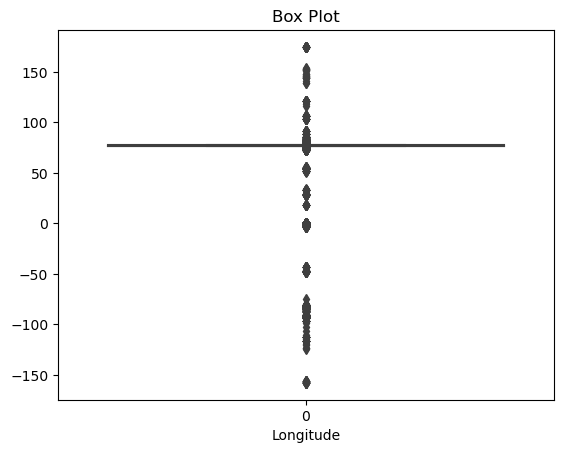

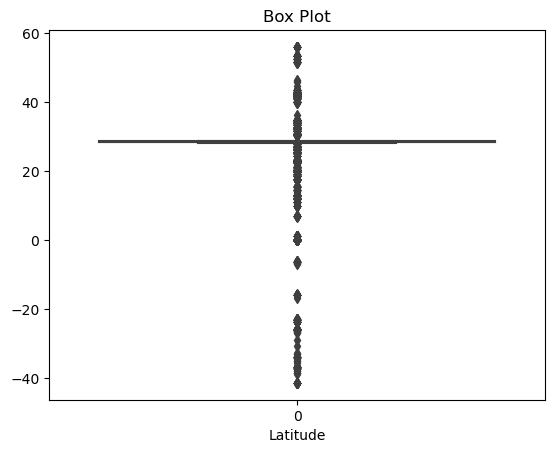

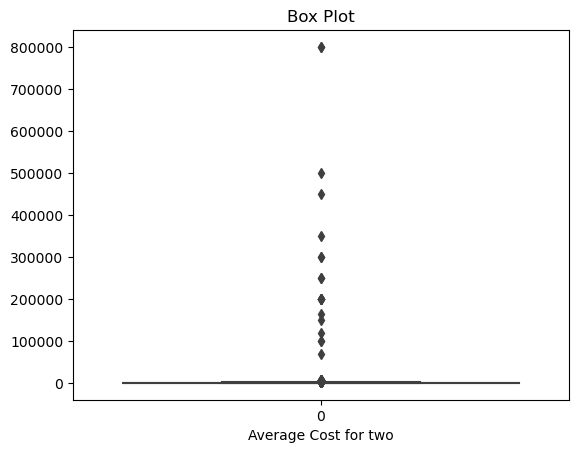

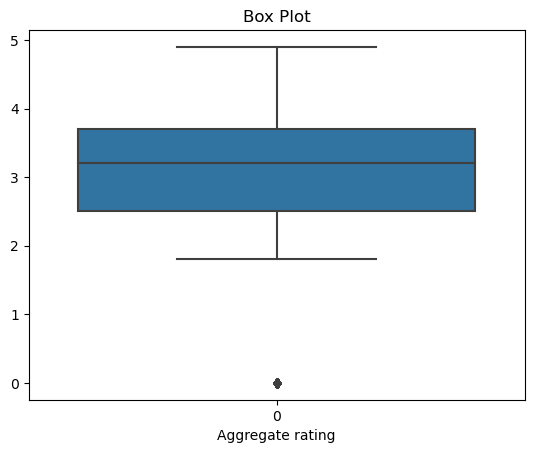

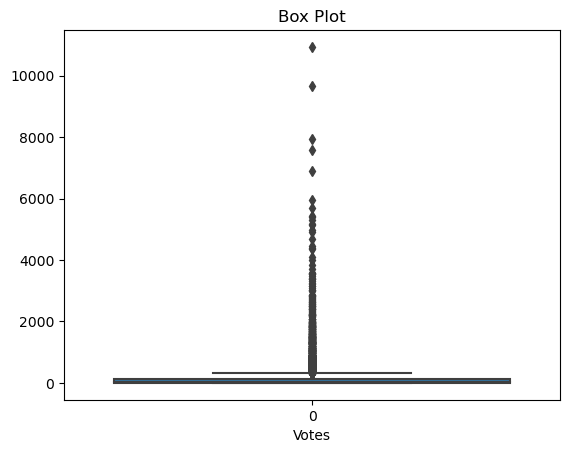

In [125]:
col=df.columns.to_list()#storing columns of data frame in 'col' variable


#creating empty list
num_c=[]
cat_c=[]

#Checking outliers via Box Plot

for i in col:#Iterating through 'col' list
    
    if df[i].dtypes=='object': #using if condition to check for 'object' data type
        cat_c.append(i)#appending 'i'
        
    elif df[i].dtypes=='int64' or 'float64': #using elif condition to check for 'float64' and 'int64' data types
        num_c.append(i)#appending 'i'
num_c.remove('Price range')#removing target variable

cat_c.append(i)#appending target variable


for i in num_c:
    sb.boxplot(df[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

All these features contains outliers.

In [126]:
#removing outliers using zscore method
#Importing necessary libraries
from scipy.stats import zscore as zs

f_outlier=df[num_c]
z=np.abs(zs(f_outlier))
z

,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes
0,0.334861,0.118764,0.021663,0.813580,0.039312
1,1.546527,2.348827,0.030968,0.549780,0.199722
2,0.334862,0.118689,0.043374,0.615730,0.146252
3,0.334536,0.121877,0.049578,0.879530,0.162525
4,0.334765,0.122404,0.012358,1.011430,0.046706
...,...,...,...,...,...
9546,3.773364,1.512081,0.073771,0.681680,0.129978
9547,3.773370,1.512037,0.073771,0.549780,0.229944
9548,3.773071,1.509099,0.072840,0.813580,0.002115
9549,3.488640,1.321086,0.072840,0.813580,0.002115


The **variable 'z'** holds the **zscores values** of these features.

In [127]:
#checking outliers as per the threshold value as '3'
np.where(z>3)

(array([  20,  102,  103,  104,  107,  111,  112,  115,  119,  169,  181,
         183,  187,  189,  190,  191,  193,  197,  200,  520,  523,  539,
         611,  623,  624,  627,  628,  629,  631,  632,  634,  840,  930,
         931, 1215, 1237, 1242, 1676, 1678, 1680, 1683, 1687, 1690, 1714,
        1720, 1778, 1780, 1782, 1785, 1786, 1787, 1788, 1789, 1790, 1792,
        1856, 1859, 1860, 1861, 1864, 1866, 1868, 1871, 1875, 2011, 2256,
        2381, 2384, 2389, 2392, 2394, 2401, 2402, 2404, 2409, 2417, 2425,
        2431, 2432, 2433, 2436, 2444, 2451, 2456, 2459, 2461, 2469, 2470,
        2471, 2477, 2483, 2486, 2488, 2491, 2492, 2493, 2494, 2495, 2692,
        2695, 2712, 2713, 2714, 2814, 2964, 2965, 2975, 2977, 2981, 3352,
        3359, 3360, 3362, 3368, 3369, 3370, 3374, 3463, 3538, 3554, 3696,
        3762, 4014, 4015, 4025, 4049, 4383, 4402, 5520, 5693, 5910, 6035,
        6077, 6085, 6088, 6224, 6297, 6373, 6409, 6421, 6463, 7239, 7770,
        7810, 8533, 8537, 8541, 8543, 

In [128]:
#checking value of the outliers
z.iloc[20,4]

3.313033670011215

In [129]:
z.iloc[102,4]

5.251907419426422

In [130]:
z.iloc[103,4]

5.142642352013334

In [131]:
z.iloc[104,4]

25.054457296547206

We can confirm that these values holds outlier as per the threshold value.

In [132]:
#Removing outliers 
zscore=df[(z<3).all(axis=1)]#storing values in 'zscore' variable

In [133]:
#Using IQR method to remove outliers from the original data frame
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=df[~((df< (q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [134]:
print('Data loss percentage after removing outliers via zscore method',((df.shape[0]-zscore.shape[0])/df.shape[0])*100)
print('Data loss percentage after removing outliers via IQR method',((df.shape[0]-IQR.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers via zscore method 8.323735734478065
Data loss percentage after removing outliers via IQR method 50.748612710710916


We can observe that **zscore method performed well** than IQR method, hence, we will **update** the data frame with **zscore method.**

In [135]:
outliers=df.shape[0]-zscore.shape[0]#storing number of outliers removed in 'outliers' variable

print(f'Outliers removed : {outliers}')#printing
df=zscore#Updating data frame

Outliers removed : 795


In [136]:
df.shape#checking shape of data frame

(8756, 19)

Now the data frame has **8756 rows.**

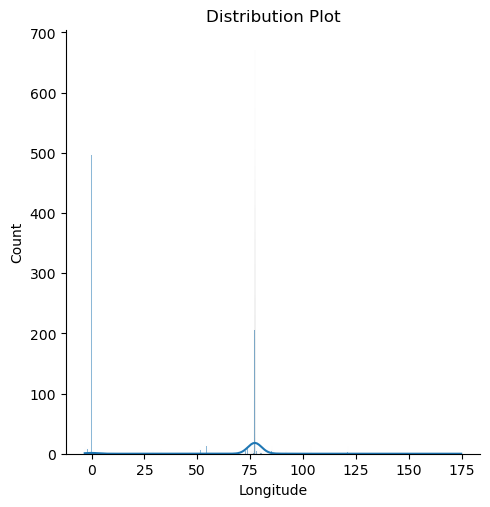

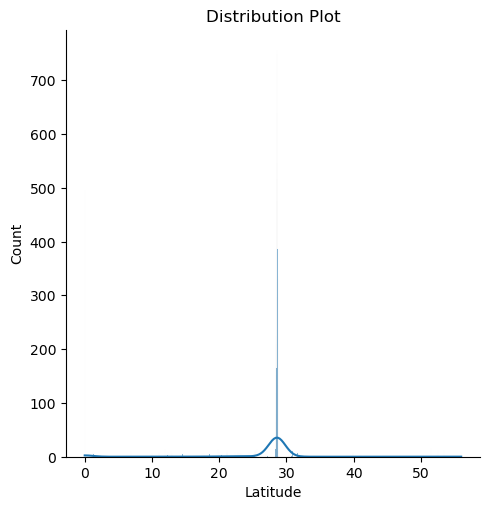

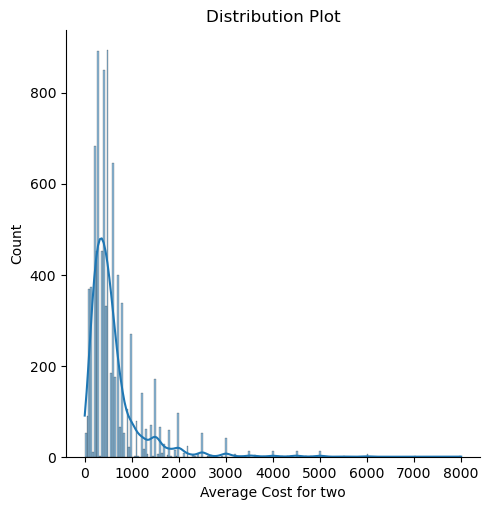

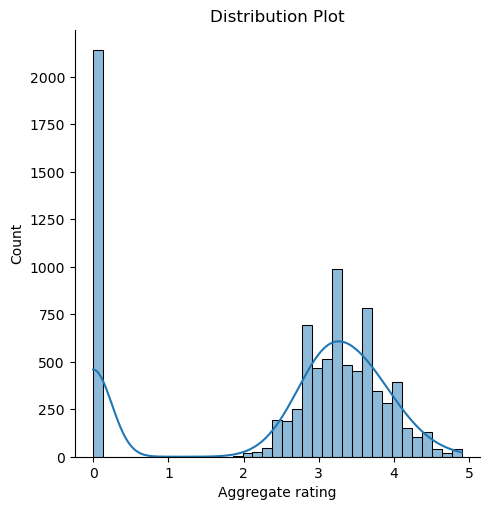

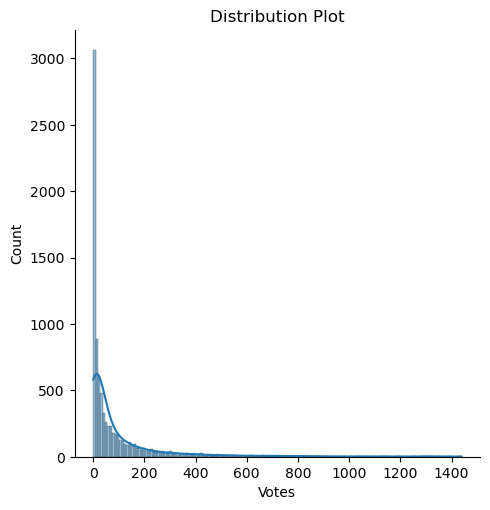

In [137]:
#checking distribution of columns
for i in num_c:
    sb.displot(df[i],kde=True)
    plt.title('Distribution Plot')    

**'Average Cost for two', 'Price range' and 'Votes'** columns are skewed to the right.  
  
**'Longitude', 'Latitude' and 'Aggregate rating'** features are skewed to the left.

In [138]:
df.skew()

Longitude              -3.179687
Latitude               -2.246169
Average Cost for two    3.667387
Price range             0.987956
Aggregate rating       -0.887535
Votes                   3.555810
dtype: float64

All of these  columns are in **unacceptable range**, thus , we can use **yeojohnson method** to remove skewness. 

In [139]:
from scipy.stats import yeojohnson as yj #importing library

for i in num_c:#iterating through 'num_c' variable
    df[i],p=yj(df[i])

df.skew()

Longitude              -0.963748
Latitude                0.409584
Average Cost for two    0.053731
Price range             0.987956
Aggregate rating       -0.620066
Votes                  -0.012360
dtype: float64

Skewness is reduced, however **'Longitude' and 'Aggregate rating'** column are still in  **unacceptable range**, thus , we can try **square root method**.         

In [140]:
a=['Longitude', 'Aggregate rating']#creating list

sk_data=df.copy()#copying data of 'df' data frame

for i in a:#iterating through 'a' variable
    
    sk_data[i]=np.sqrt(sk_data[i])

sk_data.skew()

Longitude              -3.322542
Latitude                0.409584
Average Cost for two    0.053731
Price range             0.987956
Aggregate rating       -1.028588
Votes                  -0.012360
dtype: float64

Skewness is increased, trying log+ 1 method.

In [141]:
a=['Longitude', 'Aggregate rating']#creating list

sk_data=df.copy()#copying data of 'df' data frame

for i in a:#iterating through 'a' variable
    
    sk_data[i]=np.log1p(sk_data[i])

sk_data.skew()

Longitude              -3.639990
Latitude                0.409584
Average Cost for two    0.053731
Price range             0.987956
Aggregate rating       -1.070585
Votes                  -0.012360
dtype: float64

Skewness is increased, trying cube root method.

In [142]:
sk_data=df.copy()#copying data of 'df' data frame

for i in a:#iterating through 'a' variable
    
    sk_data[i]=np.cbrt(sk_data[i])

sk_data.skew()

Longitude              -3.318095
Latitude                0.409584
Average Cost for two    0.053731
Price range             0.987956
Aggregate rating       -1.116108
Votes                  -0.012360
dtype: float64

Skewness is increased. We have applied various applicable methods, thus we can **accept  this value as a threshold value**.           

In [143]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,India,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",8540.395496,183.395240,"North Indian, Mughlai",9.712498,Indian Rupees(Rs.),No,No,No,3,8.151739,Yellow,Good,5.201439
1,India,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",9.329958,Indian Rupees(Rs.),No,No,No,2,6.975607,Yellow,Good,4.464518
2,India,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",8540.411004,183.385898,North Indian,8.684956,Indian Rupees(Rs.),No,No,No,2,7.263085,Yellow,Good,4.767270
3,India,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",8537.112079,183.781731,Rajasthani,8.269471,Indian Rupees(Rs.),No,No,No,2,8.456605,Green,Very Good,4.683510
4,India,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",8539.421179,183.847151,"North Indian, Chinese, Mughlai",10.038654,Indian Rupees(Rs.),No,No,No,3,9.079150,Green,Very Good,5.459257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,United Kingdom,Gaucho,Manchester,"2A St Mary's Street, Spinningfields, Mancheste...",Spinningfields,"Spinningfields, Manchester",-1.015692,573.999624,"Argentine, American",5.546934,Pounds(£),No,No,No,4,10.044625,Dark Green,Excellent,6.828965
9113,United Kingdom,Akbars,Manchester,"73-83 Liverpool Road, Spinningfields, Manchest...",Spinningfields,"Spinningfields, Manchester",-1.017325,573.894778,Indian,4.113574,Pounds(£),No,No,No,2,9.079150,Green,Very Good,6.318478
9114,United Kingdom,San Carlo,Manchester,"40-42 King Street West, Spinningfields, Manche...",Spinningfields,"Spinningfields, Manchester",-1.015968,573.984190,Italian,3.865982,Pounds(£),No,No,No,2,9.396778,Green,Very Good,7.071297
9115,United Kingdom,Mr Cooper's House & Garden - The Midland,Manchester,"The Midland, Peter Street, Deansgate, Manchest...","The Midland, Deansgate","The Midland, Deansgate, Manchester",-1.015101,573.910392,"European, Mediterranean, Contemporary",4.979404,Pounds(£),Yes,No,No,3,9.079150,Green,Very Good,4.402301


In [144]:
for i in cat_c:#iterating through 'cat_c' list
    
    df[i]=le.fit_transform(df[i])#Transforming columns
    
df

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,2883,1,3938,15,15,8540.395496,183.395240,1210,9.712498,3,0,0,0,3,8.151739,5,2,140
1,0,4768,1,3989,15,15,0.000000,0.000000,1210,9.329958,3,0,0,0,2,6.975607,5,2,71
2,0,6274,1,5560,15,15,8540.411004,183.385898,1006,8.684956,3,0,0,0,2,7.263085,5,2,94
3,0,1500,1,95,157,158,8537.112079,183.781731,1330,8.269471,3,0,0,0,2,8.456605,1,5,87
4,0,4441,1,1086,157,158,8539.421179,183.847151,1072,10.038654,3,0,0,0,3,9.079150,1,5,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,8,2336,35,1319,788,841,-1.015692,573.999624,57,5.546934,5,0,0,0,4,10.044625,0,1,527
9113,8,194,35,2314,788,841,-1.017325,573.894778,753,4.113574,5,0,0,0,2,9.079150,1,5,376
9114,8,5006,35,1805,788,841,-1.015968,573.984190,774,3.865982,5,0,0,0,2,9.396778,1,5,596
9115,8,3885,35,7887,838,891,-1.015101,573.910392,600,4.979404,5,1,0,0,3,9.079150,1,5,67


All the catagorical data have been encoded.

In [145]:
#Checking correlation between independant and dependant variables
cor=df.corr()
cor

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
Country,1.000000,0.019339,-0.190775,-0.052089,-0.075868,-0.074458,-0.302537,0.383886,-0.036503,-0.277837,0.479234,0.015574,-0.054965,-0.010216,0.236200,0.202464,-0.157810,0.129722,0.170027
Restaurant Name,0.019339,1.000000,0.001480,0.003419,0.007021,0.007049,0.010843,0.016522,0.057685,0.049209,0.011840,0.039287,0.030244,0.012731,0.067217,0.031487,-0.009391,0.010931,0.029660
City,-0.190775,0.001480,1.000000,-0.073703,-0.013498,-0.017258,0.112360,-0.015953,0.017744,-0.036605,-0.179236,-0.008279,-0.003063,-0.019945,-0.145719,-0.146518,0.098000,-0.083796,-0.107232
Address,-0.052089,0.003419,-0.073703,1.000000,0.148533,0.150355,-0.004681,-0.028987,-0.013820,0.018505,-0.039459,-0.009390,-0.000654,0.029356,-0.021549,-0.102005,0.058493,0.043551,-0.087794
Locality,-0.075868,0.007021,-0.013498,0.148533,1.000000,0.999162,-0.002158,-0.011051,-0.011836,-0.059282,-0.041923,-0.070233,-0.046986,-0.010331,-0.114817,-0.165451,0.018026,-0.008356,-0.164352
Locality Verbose,-0.074458,0.007049,-0.017258,0.150355,0.999162,1.000000,-0.003259,-0.011515,-0.012912,-0.057817,-0.041409,-0.069349,-0.047377,-0.010310,-0.111872,-0.164179,0.018265,-0.006807,-0.161798
Longitude,-0.302537,0.010843,0.112360,-0.004681,-0.002158,-0.003259,1.000000,0.294355,0.014243,0.169160,-0.366735,0.068741,0.119548,0.013823,0.005374,0.091361,-0.039117,-0.114944,0.051041
Latitude,0.383886,0.016522,-0.015953,-0.028987,-0.011051,-0.011515,0.294355,1.000000,0.021691,-0.178741,0.341621,0.045852,0.091353,0.013222,-0.002439,0.088676,-0.075272,-0.091807,0.008421
Cuisines,-0.036503,0.057685,0.017744,-0.013820,-0.011836,-0.012912,0.014243,0.021691,1.000000,0.003594,0.012402,0.040587,-0.038201,0.005417,0.010874,-0.061401,-0.039417,-0.060839,-0.032460
Average Cost for two,-0.277837,0.049209,-0.036605,0.018505,-0.059282,-0.057817,0.169160,-0.178741,0.003594,1.000000,-0.148484,0.538185,0.192374,0.029197,0.733156,0.333458,-0.031122,0.014607,0.357679


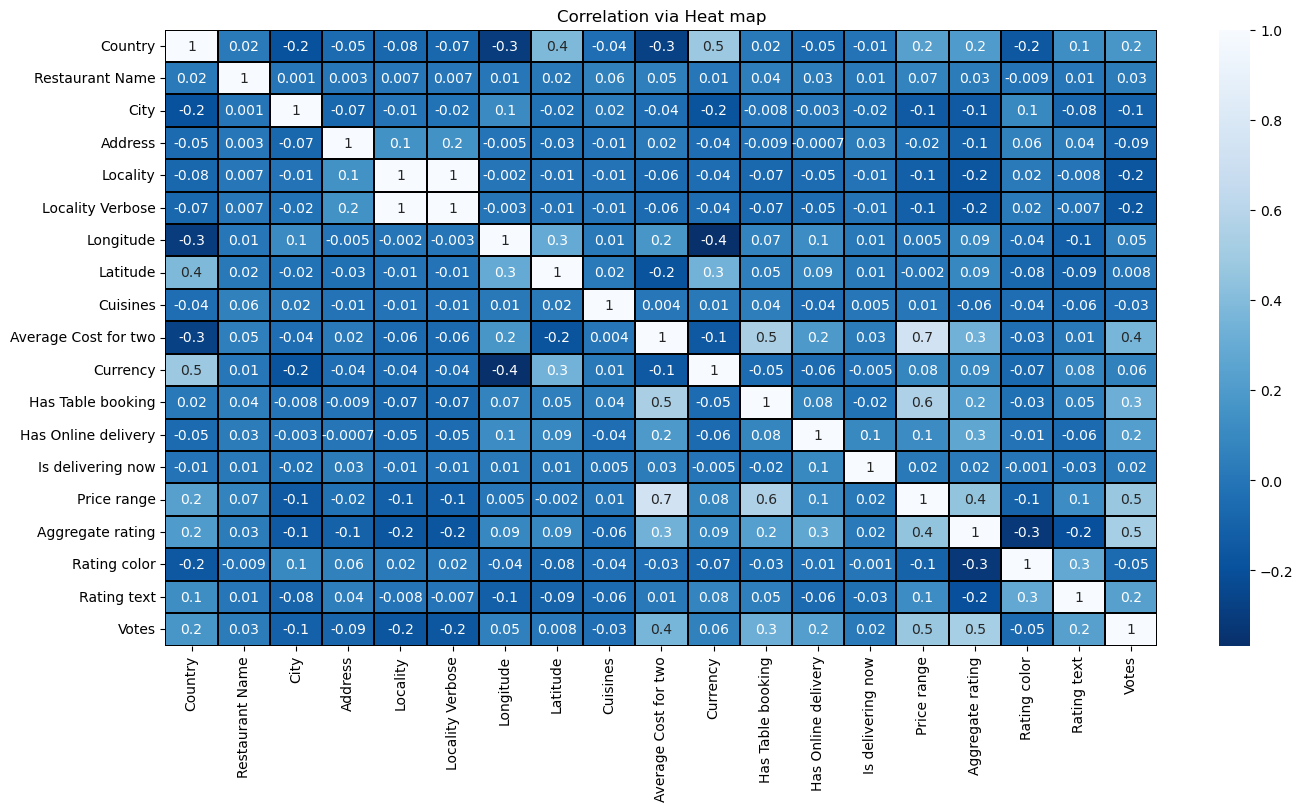

In [148]:
#Visualizing correlation via heat map
plt.figure(figsize=(16,8))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
  
1)**'Country', 'Restaurant Name', 'Longitude', 'Cuisines', 'Currency', 'Has Online delivery', 'Is delivering now' and 'Rating text'** features have **low positive correlation** with **target variable.**  
  
2)**'Average Cost for two', 'Has Table booking', 'Aggregate rating' and 'Votes'** features have **moderate positive correlation** with **target variable.** 
  
3)**'City', 'Address', 'Locality','Locality Verboose', 'Latitude' and 'Rating color'** features have **low negative correlation** with  **target variable.**   
    
4)These are the following **pairs with high positive correlation with each other:**  
  
**'Locality' and 'Locality Verboose'** features      

In [156]:
#Separating features and target variable 
x=df.drop('Price range',axis=1)
y=df['Price range']    

In [157]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape,'\nDimensions of label:',y.shape)

Dimensions of features: (8756, 18) 
Dimensions of label: (8756,)


We can observe that both features and lable have **same number of rows**.  
'x' contains 18 features.

In [158]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc

sc=sc()#creating instance

x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)#transforming data
x

,Country,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes
0,-0.163627,-0.216444,-3.659215,-0.087937,-2.082857,-2.028021,0.308199,-0.046351,1.035618,0.807993,-0.073690,-0.377866,-0.61343,-0.062435,1.001236,1.391105,0.201585,0.349064
1,-0.163627,0.756123,-3.659215,-0.066143,-2.082857,-2.028021,-3.280600,-2.875395,1.035618,0.552185,-0.073690,-0.377866,-0.61343,-0.062435,0.624695,1.391105,0.201585,-0.121886
2,-0.163627,1.533145,-3.659215,0.605218,-2.082857,-2.028021,0.308205,-0.046495,0.554500,0.120866,-0.073690,-0.377866,-0.61343,-0.062435,0.716731,1.391105,0.201585,0.035097
3,-0.163627,-0.930004,-3.659215,-1.730228,-1.488648,-1.467368,0.306819,-0.040389,1.318629,-0.156973,-0.073690,-0.377866,-0.61343,-0.062435,1.098840,-1.433526,2.038936,-0.012680
4,-0.163627,0.587407,-3.659215,-1.306728,-1.488648,-1.467368,0.307789,-0.039380,0.710156,1.026096,-0.073690,-0.377866,-0.61343,-0.062435,1.298149,-1.433526,2.038936,0.601602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,7.337514,-0.498669,-0.336690,-1.207156,1.151814,1.210436,-3.281027,5.979089,-1.683643,-1.977560,4.116111,-0.377866,-0.61343,-0.062435,1.607248,-2.139684,-0.410865,2.990479
8752,7.337514,-1.603835,-0.336690,-0.781947,1.151814,1.210436,-3.281028,5.977472,-0.042181,-2.936062,4.116111,-0.377866,-0.61343,-0.062435,1.298149,-1.433526,2.038936,1.959849
8753,7.337514,0.878919,-0.336690,-0.999466,1.151814,1.210436,-3.281027,5.978851,0.007346,-3.101629,4.116111,-0.377866,-0.61343,-0.062435,1.399838,-1.433526,2.038936,3.461429
8754,7.337514,0.300539,-0.336690,1.599652,1.361043,1.406469,-3.281027,5.977713,-0.403020,-2.357073,4.116111,2.646442,-0.61343,-0.062435,1.298149,-1.433526,2.038936,-0.149187


The data is scaled using StandarScaler method to overcome the **issue of biasness.**

In [159]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library

v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.997560,Country
1,1.008554,Restaurant Name
2,1.103940,City
3,1.049805,Address
4,606.433255,Locality
5,606.371516,Locality Verbose
6,1.799401,Longitude
7,1.920775,Latitude
8,1.024420,Cuisines
9,1.972225,Average Cost for two


**'Locality' and  'Locality Verbose'** features have **high VIF value**, thus posing **multicollinearity problem**. We can **drop 'Locality'** feature as it has the **highest VIF value.** 

In [160]:
x.drop('Locality',axis=1,inplace=True)#Dropping 'Locality' feature
x

,Country,Restaurant Name,City,Address,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes
0,-0.163627,-0.216444,-3.659215,-0.087937,-2.028021,0.308199,-0.046351,1.035618,0.807993,-0.073690,-0.377866,-0.61343,-0.062435,1.001236,1.391105,0.201585,0.349064
1,-0.163627,0.756123,-3.659215,-0.066143,-2.028021,-3.280600,-2.875395,1.035618,0.552185,-0.073690,-0.377866,-0.61343,-0.062435,0.624695,1.391105,0.201585,-0.121886
2,-0.163627,1.533145,-3.659215,0.605218,-2.028021,0.308205,-0.046495,0.554500,0.120866,-0.073690,-0.377866,-0.61343,-0.062435,0.716731,1.391105,0.201585,0.035097
3,-0.163627,-0.930004,-3.659215,-1.730228,-1.467368,0.306819,-0.040389,1.318629,-0.156973,-0.073690,-0.377866,-0.61343,-0.062435,1.098840,-1.433526,2.038936,-0.012680
4,-0.163627,0.587407,-3.659215,-1.306728,-1.467368,0.307789,-0.039380,0.710156,1.026096,-0.073690,-0.377866,-0.61343,-0.062435,1.298149,-1.433526,2.038936,0.601602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,7.337514,-0.498669,-0.336690,-1.207156,1.210436,-3.281027,5.979089,-1.683643,-1.977560,4.116111,-0.377866,-0.61343,-0.062435,1.607248,-2.139684,-0.410865,2.990479
8752,7.337514,-1.603835,-0.336690,-0.781947,1.210436,-3.281028,5.977472,-0.042181,-2.936062,4.116111,-0.377866,-0.61343,-0.062435,1.298149,-1.433526,2.038936,1.959849
8753,7.337514,0.878919,-0.336690,-0.999466,1.210436,-3.281027,5.978851,0.007346,-3.101629,4.116111,-0.377866,-0.61343,-0.062435,1.399838,-1.433526,2.038936,3.461429
8754,7.337514,0.300539,-0.336690,1.599652,1.406469,-3.281027,5.977713,-0.403020,-2.357073,4.116111,2.646442,-0.61343,-0.062435,1.298149,-1.433526,2.038936,-0.149187


**'Locality'** feature is **dropped successfully.**

In [161]:
#re-checking varience inflation factor 
v=pd.DataFrame()#creating empty data frame

v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]#Storing varience inflation factor values in 'VIF' column
v['Features']=x.columns#creating new column named 'Features'
v

,VIF,Features
0,1.996975,Country
1,1.008553,Restaurant Name
2,1.097649,City
3,1.048299,Address
4,1.060927,Locality Verbose
5,1.798952,Longitude
6,1.920771,Latitude
7,1.023984,Cuisines
8,1.971202,Average Cost for two
9,1.689156,Currency


Now the multicollinearity problem is solved. 

In [163]:
x.shape#checking shape of x

(8756, 17)

Now **'x'** has **17 features**.

In [165]:
y.value_counts()#checking value counts of 'y'

1    4293
2    2880
3    1140
4     443
Name: Price range, dtype: int64

This shows that this data is imbalanced , to balance data, we can use oversampling method.

In [166]:
#oversampling the data
from imblearn.over_sampling import SMOTE #importing necessary library

sm=SMOTE()#creating instance

x1,y1=sm.fit_resample(x,y)#sampling data

In [167]:
y1.value_counts()#checking value counts of 'y1'

3    4293
2    4293
4    4293
1    4293
Name: Price range, dtype: int64

The data is balanced now.

In [168]:
#checking number of sampled data  
print('Dimensions of features before sampling:',x.shape[0],'\nDimensions of label before sampling:',y.shape[0],'\nDimensions of features after sampling:',x1.shape[0],'\nDimensions of label after sampling:',y1.shape[0],'\nDiffernce = ',x1.shape[0]-x.shape[0])#printing

#Updating features and label
x=x1
y=y1

Dimensions of features before sampling: 8756 
Dimensions of label before sampling: 8756 
Dimensions of features after sampling: 17172 
Dimensions of label after sampling: 17172 
Differnce =  8416


In [169]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts,cross_val_score as cvs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC as SupportVectorClassifier

In [170]:
#Finding best random state on Random Forest Classifier
ac_updater=0#initilizing variable
rs_updater=0#initilizing variable

for i in range(1,50):#running 'if' loop for 49 times
    
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)#spliting data
    
    RFR=RandomForestClassifier()#creating instance
    
    RFR.fit(x_train,y_train)#fitting data
    pr=RFR.predict(x_test)#predicting data
    
    ac=accuracy_score(y_test,pr)#calculating accuracy score 
    
    if ac>ac_updater:#using if condition to update 'ac_updater' and 'rs_updater' only if 'ac' is greater than 'ac_updater'
        #updating values
        ac_updater=ac
        rs_updater=i

print('Max accuracy score during the iteration is ',ac_updater,'on randome state : ',rs_updater)#printing

Max accuracy score during the iteration is  0.9943711180124224 on randome state :  35


In [171]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#Spliting data on the best random state

In [172]:
#Creating instance of  various models
LR=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()
BC=BaggingClassifier()
SVC=SupportVectorClassifier()

models=[LR,RFC,ETC,GBC,ABC,BC,SVC]#Creating list containing the instances of the models

log=float('inf')#Initializing 'log' variable  to positive infinity
    
for i in models:#Iterating models 
    
    i.fit(x_train,y_train)#fitting data 
    pr=i.predict(x_test)#predicting data
    
    A_score=accuracy_score(y_test,pr)#calculating accuracy  score
    C_matrix=confusion_matrix(y_test,pr)#calculating confusion matrix
    C_report=classification_report(y_test,pr)#calculating classification report
    
    score=cvs(i,x,y)#calculating Cross Validation Score
    diff=abs(A_score - score.mean())*100  #calculating difference of accuracy score and Cross Validation Score
    
    #Printing    
    print('\n','Accuracy score of',str(i).split('(')[0],'is',A_score,'\n','\nConfusion matrix of',str(i).split('(')[0],':\n',C_matrix,'\nClassification report of ',str(i).split('(')[0],':\n',C_report,'\n')
    print('\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between Accuracy score and cross validation is ',diff)

    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when log is greater than diff and mean of score in not negative
        
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between accuracy score and cross validation i.e {b_d}')#Printing 


 Accuracy score of LogisticRegression is 0.9101319875776398 
 
Confusion matrix of LogisticRegression :
 [[1270   24    0    0]
 [  12 1218   72    2]
 [   2   63 1122  115]
 [   0    2  171 1079]] 
Classification report of  LogisticRegression :
               precision    recall  f1-score   support

           1       0.99      0.98      0.99      1294
           2       0.93      0.93      0.93      1304
           3       0.82      0.86      0.84      1302
           4       0.90      0.86      0.88      1252

    accuracy                           0.91      5152
   macro avg       0.91      0.91      0.91      5152
weighted avg       0.91      0.91      0.91      5152
 


Cross validation Score of LogisticRegression is [0.88908297 0.89257642 0.93011066 0.90972627 0.91525917] 
Mean:  0.9073510972982733 
Difference between Accuracy score and cross validation is  0.27808902793664547

 Accuracy score of RandomForestClassifier is 0.9935947204968945 
 
Confusion matrix of RandomForestCl

Here by comparing difference of accuracy score and cross validation  of various models, we can conclude that **LogisticRegression  is the best performing model** as it has the least difference between accuracy score and cross validation than the rest of the models.

In [174]:
#Using GridSearchCV  for hyperparameter tuning
from sklearn.model_selection import GridSearchCV as GSC#Importing required library

pa={'penalty': ['l1', 'l2', None],'dual':[True,False],'C':[0.01,0.1,1,10]}#defining hyper parameters

gsc=GSC(LR,pa)#creating instance

gsc.fit(x_train,y_train)#fitting data
gsc.best_params_#fetching best parameters

{'C': 0.01, 'dual': False, 'penalty': None}

In [175]:
#Applying best parameters provided by GridSearchCV
final=LogisticRegression(C=0.01,dual=False,penalty=None)

In [176]:
final.fit(x_train,y_train)#fitting data 
pr=final.predict(x_test)#predicting data

ac=accuracy_score(y_test,pr)
print(ac)

0.9126552795031055


Model's accuracy score is increased from 90% to 91%.

In [179]:
#Conclusion
Predicted_values=final.predict(x_test)#storing predicted values in 'Predicted_values' variable
Original_values=y_test#storing original values in 'Original_values' variable

#creating new data frame with Predicted and Original values
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})
conclusion.sample(20)

,Predicted Values,Original Values
6629,1,1
9069,2,2
3321,1,1
991,2,2
8956,2,2
4595,1,1
1357,2,2
16075,3,4
8554,3,4
14657,4,4


Here we can conclude that the model's overall **predicted values are close to original values.**

In [180]:
#Saving the model
import joblib#importing library
joblib.dump(final,r'D:\Models\ZR_C.obj')#saving model into desired path

['D:\\Models\\ZR_C.obj']